# Diabetes Dataset 


### ==============================
##  STEP 1

### > import packages             #
### > load the diabetes dataset   #
### > Bring data to a tabular form 
### (using pandas dataframe)      #
### ==============================

In [1]:
import warnings
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sweetviz as sv
warnings.filterwarnings("ignore")

c:\Users\geopa\AppData\Local\Programs\Python\Python37\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data=datasets.load_diabetes()
with open('dataset description.txt', 'w', encoding = 'utf-8') as w:
    w.write(data.DESCR)
    
df=pd.DataFrame(data.data, columns=data.feature_names)
df['target']=data.target

### ===========================
## STEP 2
### Problem definition
Objective of this notebook is to find a model that best fits data, for the efficient prediction of the response variable.

$ \textbf{Response variable - 'target'} $ 
represents a $ \textit{quantitative}$ measure of disease progression one year after baseline.

As '$ \textit{quantitative}$' implies the continous range of response variable, this is a (multiple) univariate regression problem.
### ===========================

### ===========================
## STEP 3
### > Exploratory Data Analysis
### ===========================

NAN Values

In [3]:
df.isna().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [4]:
print(f">> Dataset has {df.shape[1]-1} features and 1 (scalar) target variable.")
print("=====================================================================")
print(f">> Dataset has {df.shape[0]} records.")
print("=====================================================================")
print(">> First 5 records are:")
df.head()



>> Dataset has 10 features and 1 (scalar) target variable.
>> Dataset has 442 records.
>> First 5 records are:


age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019908 -0.017646   151.0  
1 -0.039493 -0.068330 -0.092204    75.0  
2 -0.002592  0.002864 -0.025930   141.0  
3  0.034309  0.022692 -0.009362   206.0  
4 -0.002592 -0.031991 -0.046641   135.0

#### Brief Description - Source url: https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

As quoted From Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) "Least Angle Regression," Annals of Statistics (with discussion), 407-499:

"Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline."

10  variables (features) have been standardized to have mean 0 and squared length = 1

##### Transformation
$$ y =\frac{x-\mu}{\sigma * \sqrt{N}} \Rightarrow \sum{y_i ^ 2} = 1 $$

### Indeed..

In [5]:

for column in df.columns:
    if column == "target":
        continue
    print(round(sum(df[column].apply(lambda x: x**2)), 2))



1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [6]:
with open('summary.txt', 'w'):
    print("==================================================")
    print("initialize text file for statistical summarization")
    print("==================================================")
summary = df.describe()
#summary
for feature in summary.columns:
    with open('summary.txt', 'a') as f:
        f.write("******************************\n")
        f.write(f"\t\t\t {feature}\n")
        f.write("******************************\n")
        f.write(str(round(summary[feature], 1)))
        f.write("\n")
        f.write(f"Null values for feature {feature}: {str(df[feature].isna().sum())}")
        f.write("\n\n")

print("\n\n")
print("\t\t Done ! ! !")
    


initialize text file for statistical summarization



		 Done ! ! !


$\textbf{summary.txt}$ contains basic statistical summary for each of the 11 variables, features and target variable.

In [7]:
print("Percentages of each sex in dataset \n==================================\n" +
      str(round(df['sex'].value_counts() / len(df), 2) *100 ) + 
      "\n==================================\n" )


Percentages of each sex in dataset 
-0.044642    53.0
 0.050680    47.0
Name: sex, dtype: float64



#### NOTE:  A good balance between two sexes is observed.

In [8]:
report = sv.analyze(df, 'target')
warnings.filterwarnings("ignore")

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)



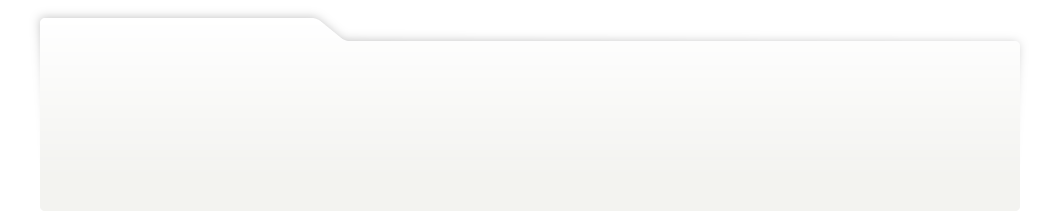
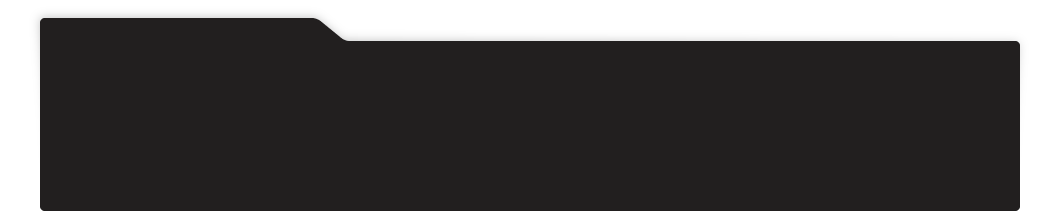
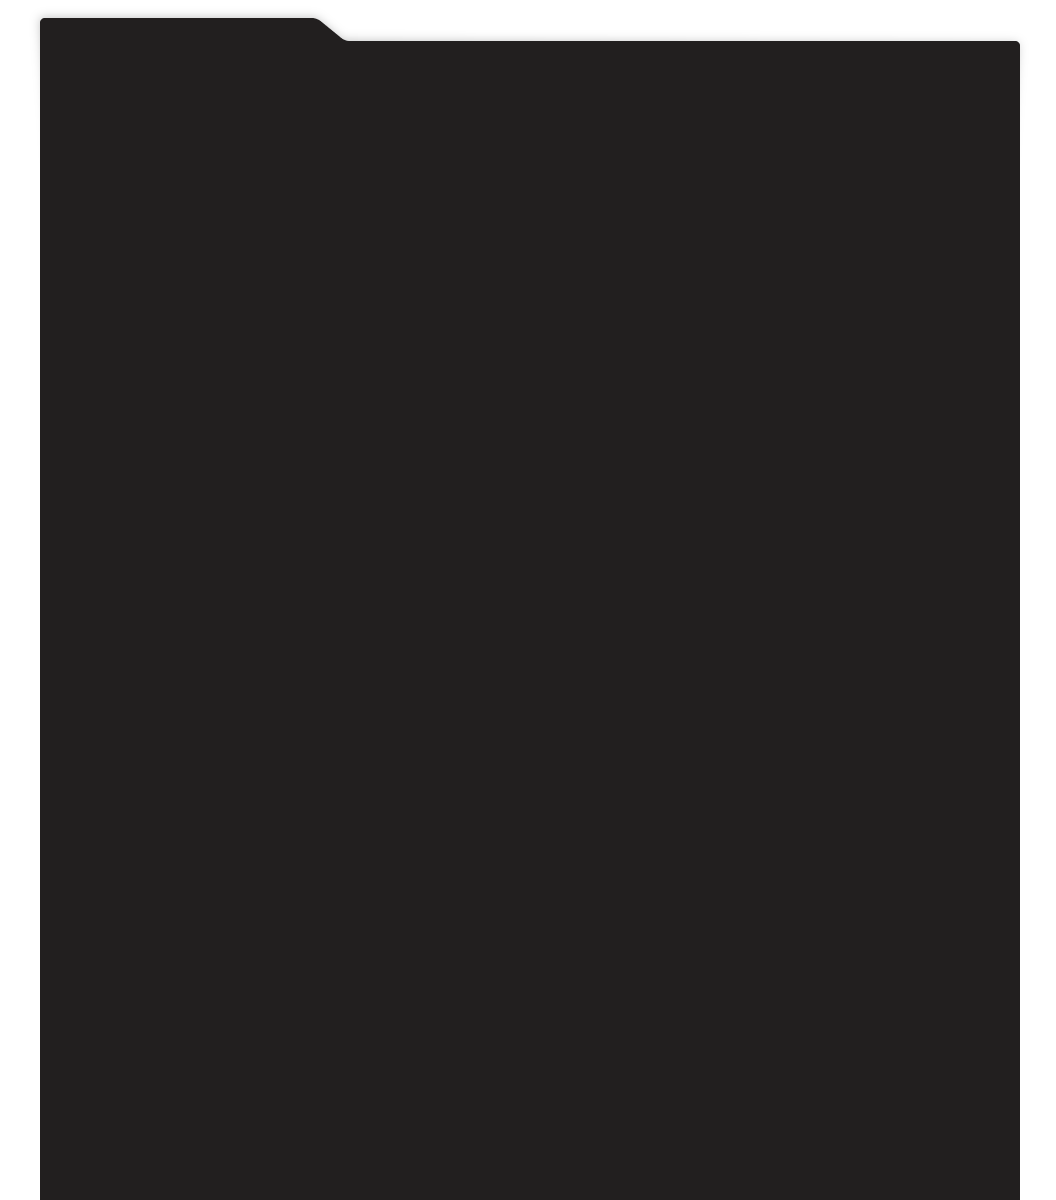
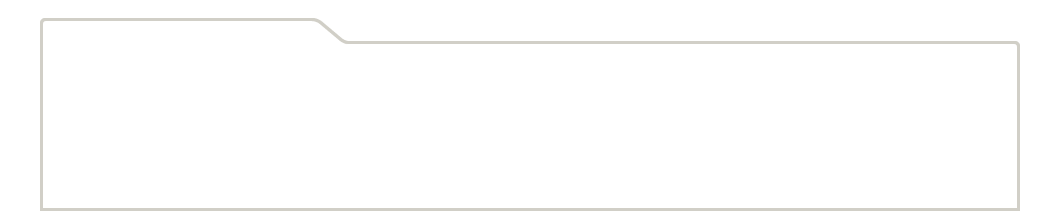
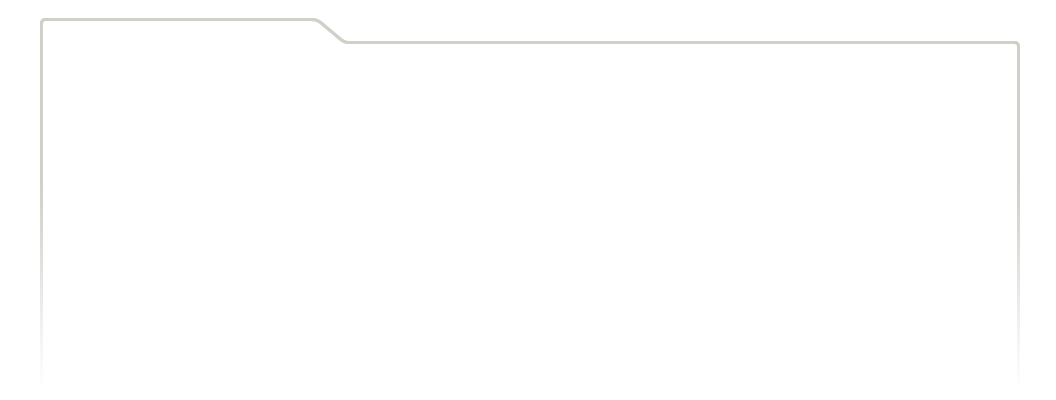
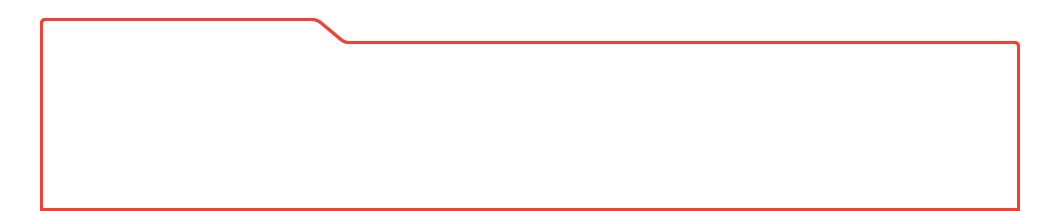
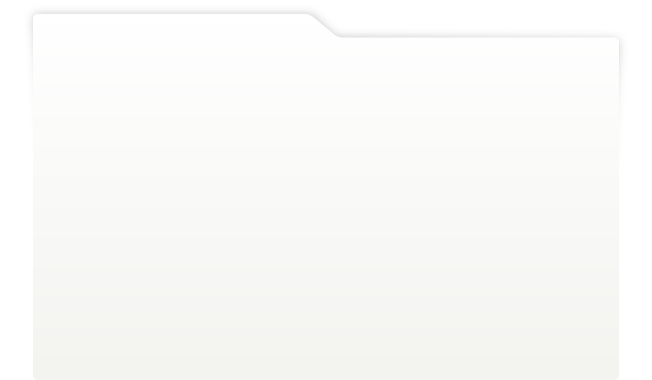
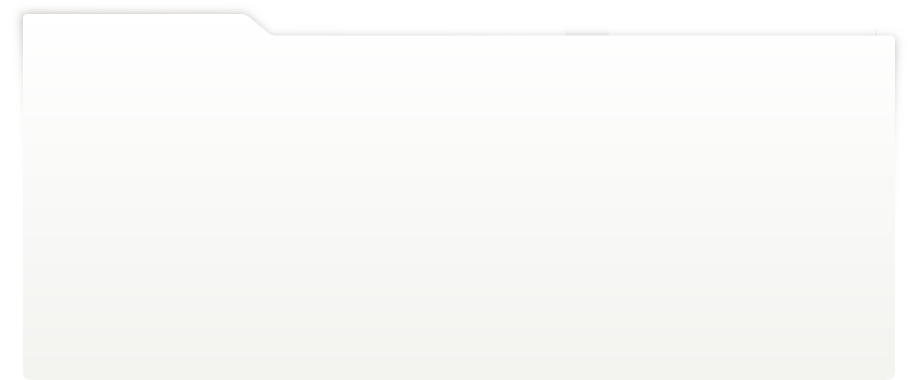
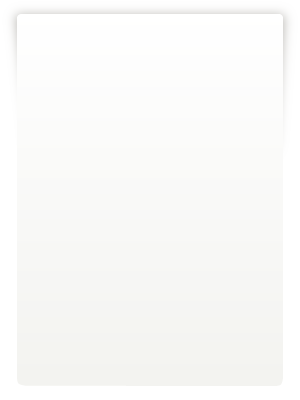
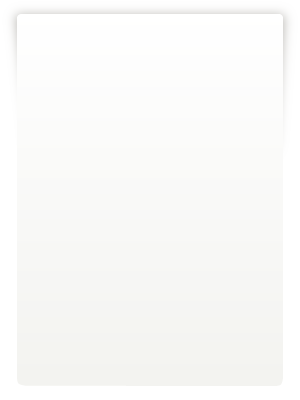
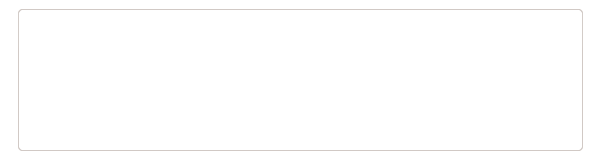
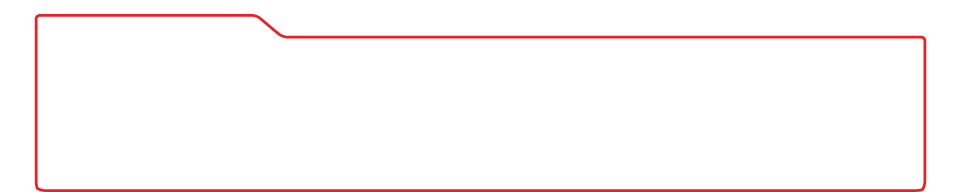
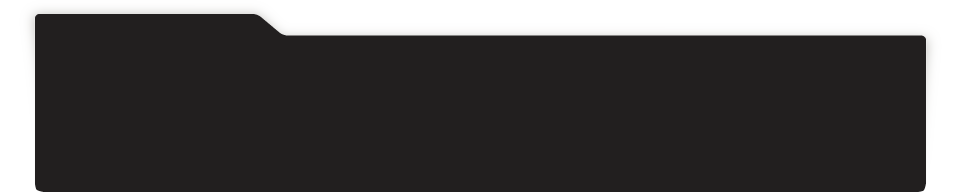
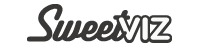
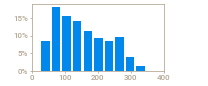
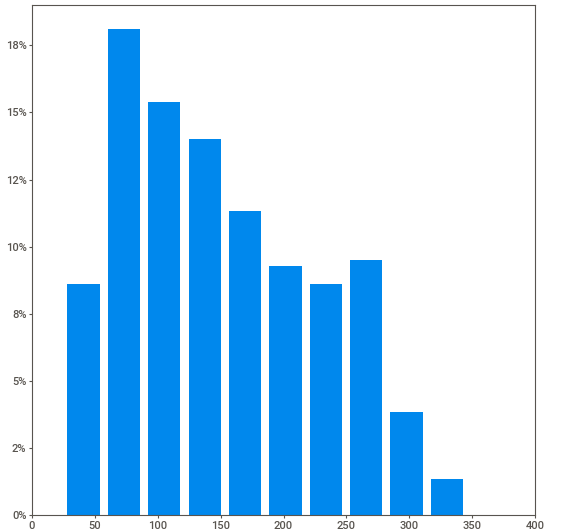
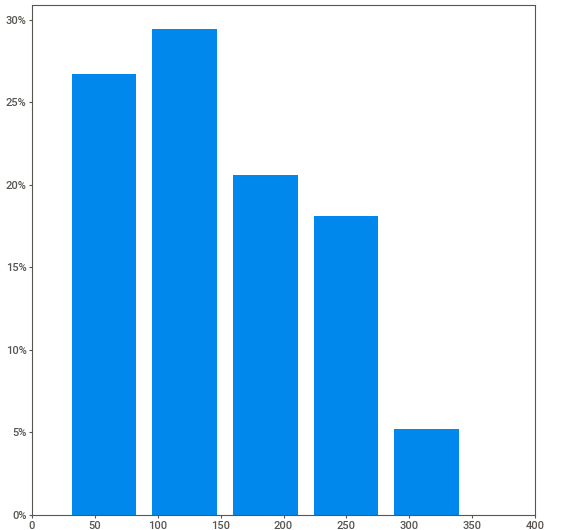
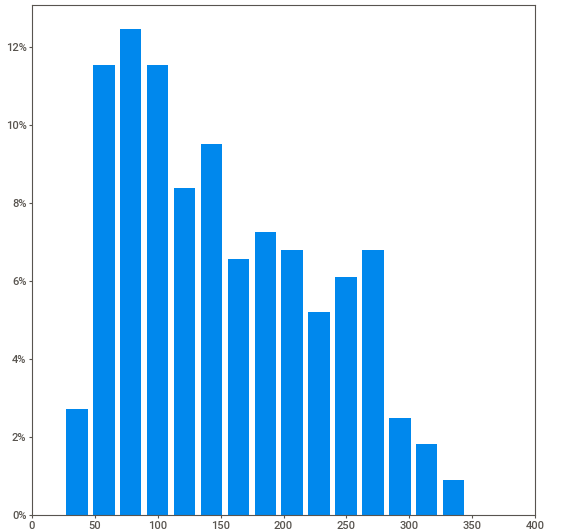
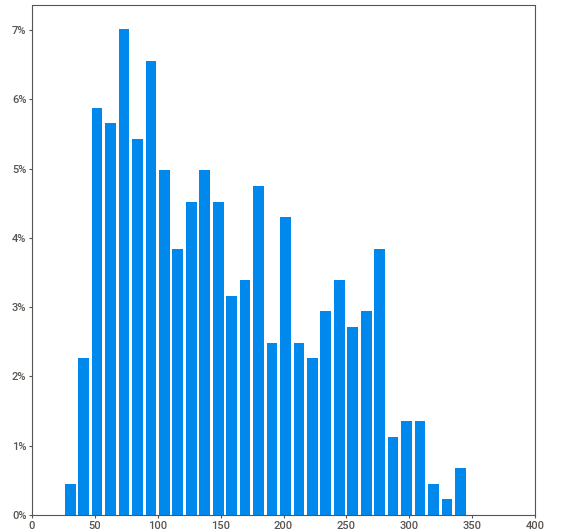
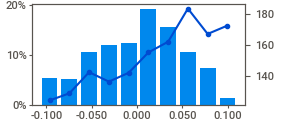
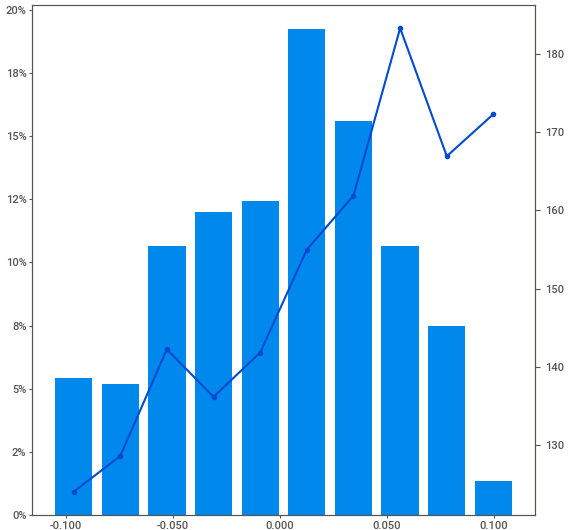
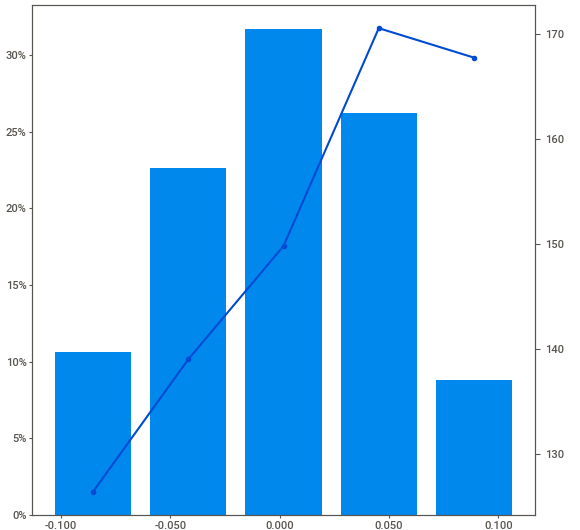
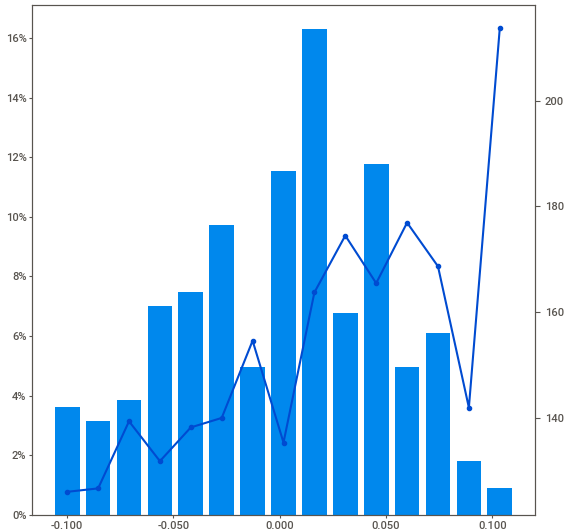
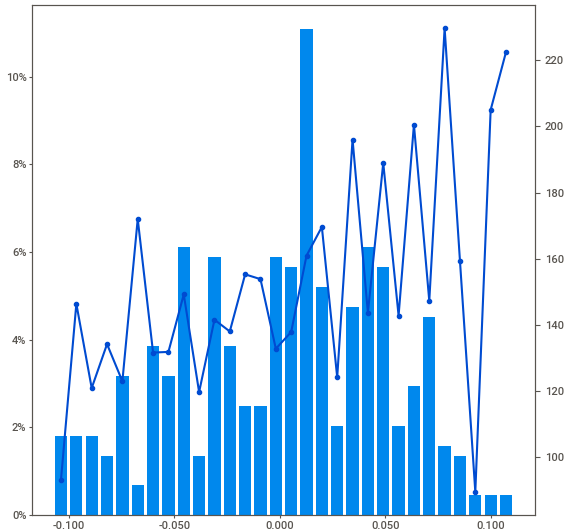
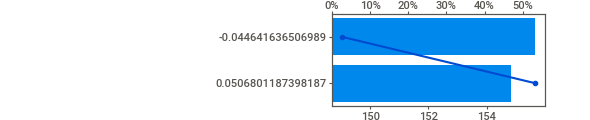
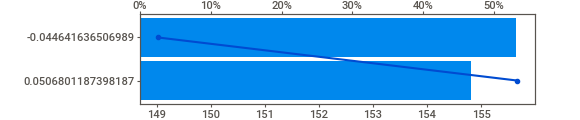
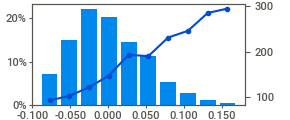
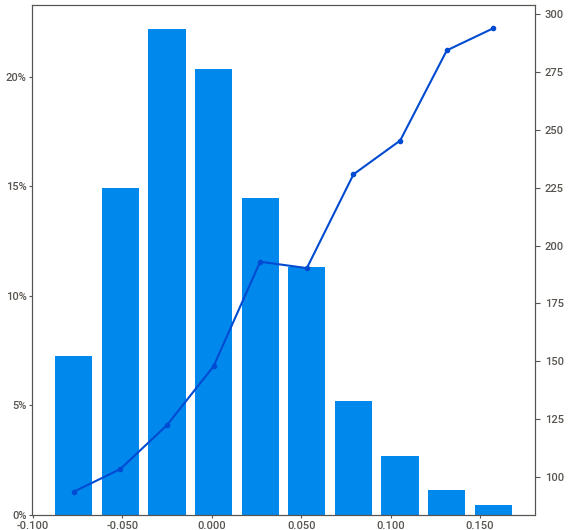
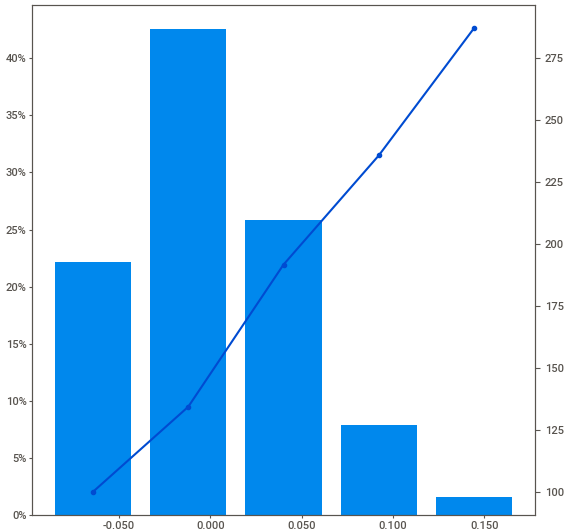
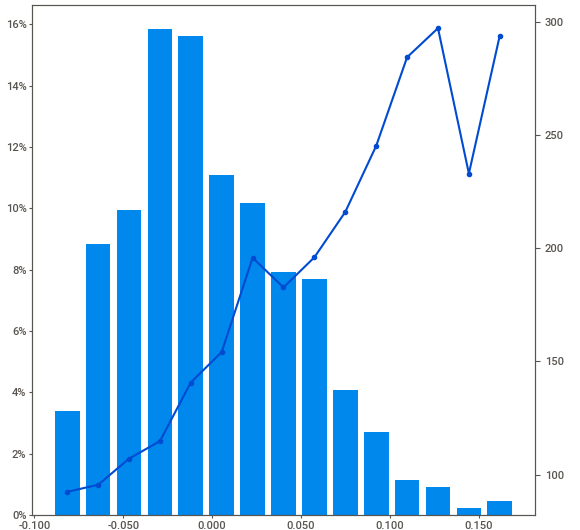
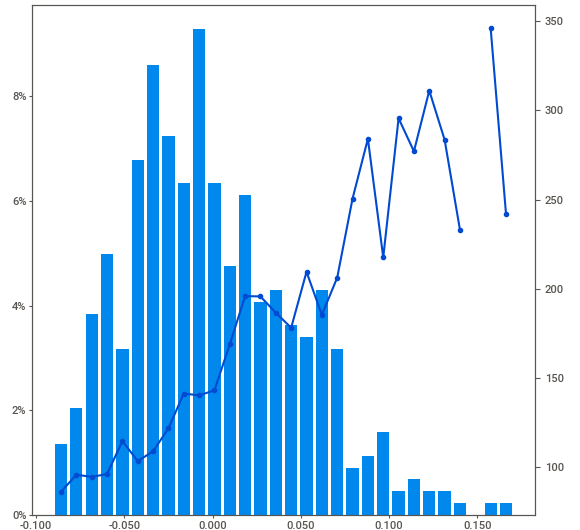
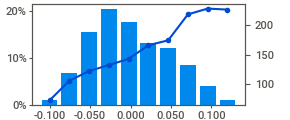
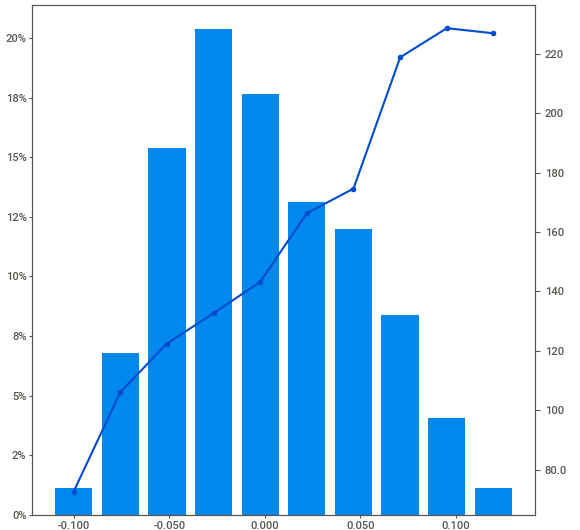
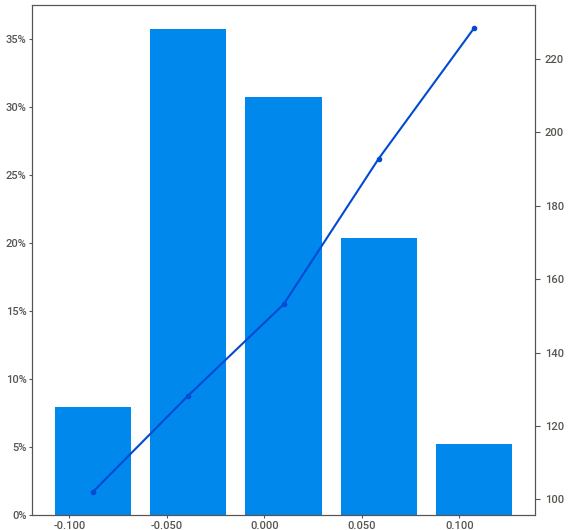
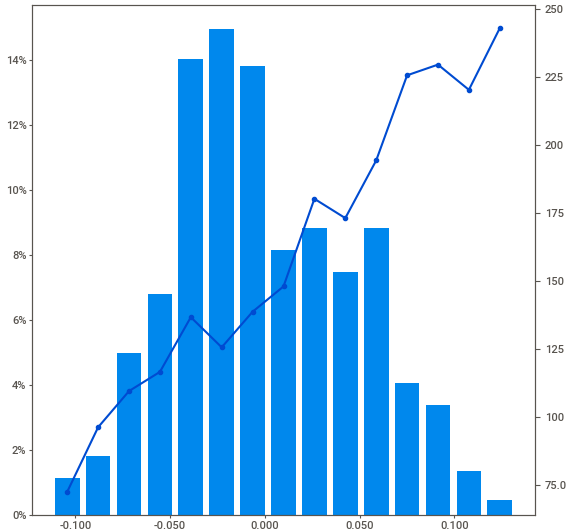
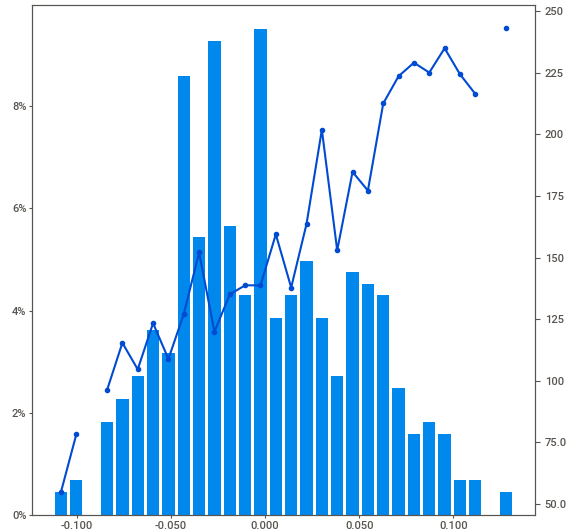
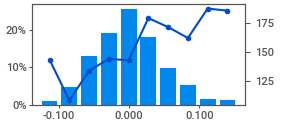
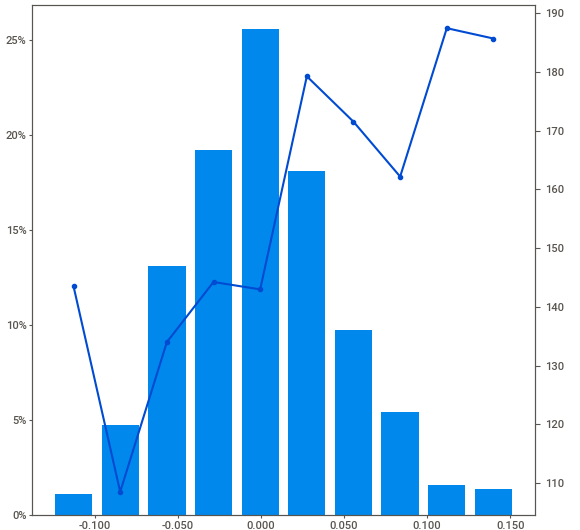
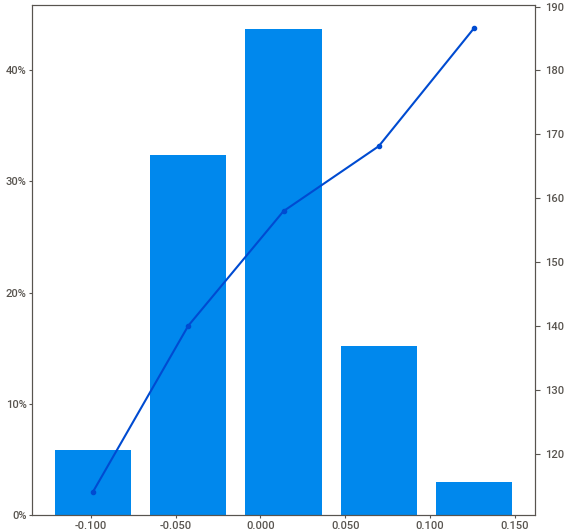
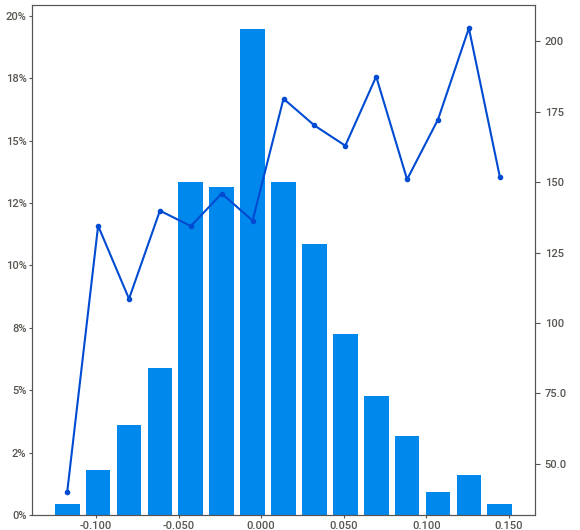
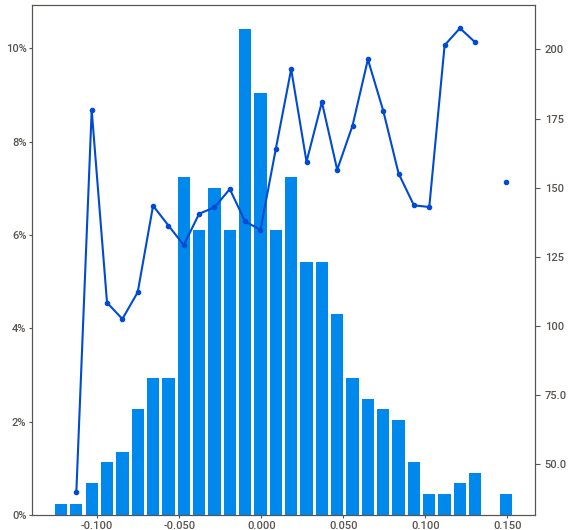
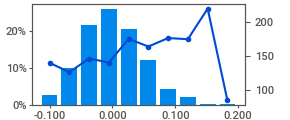
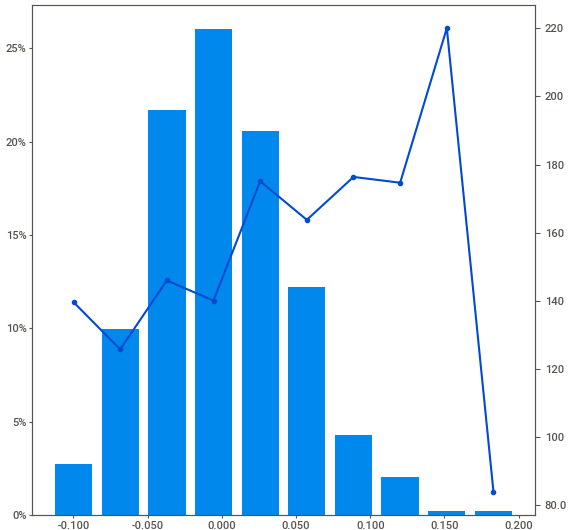
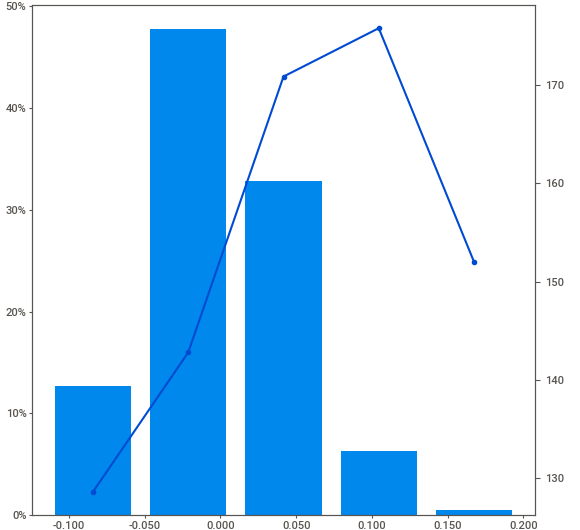
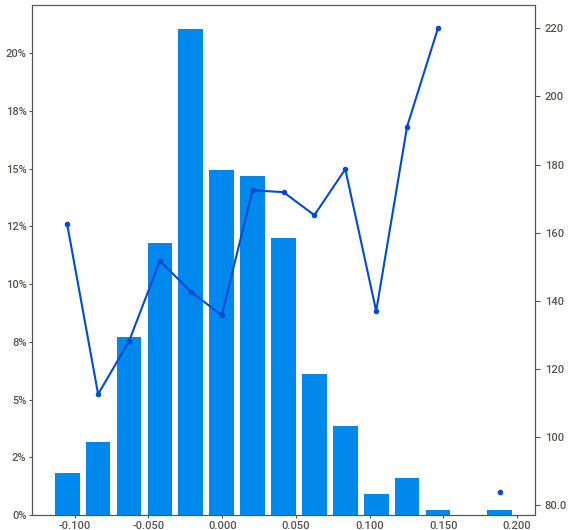
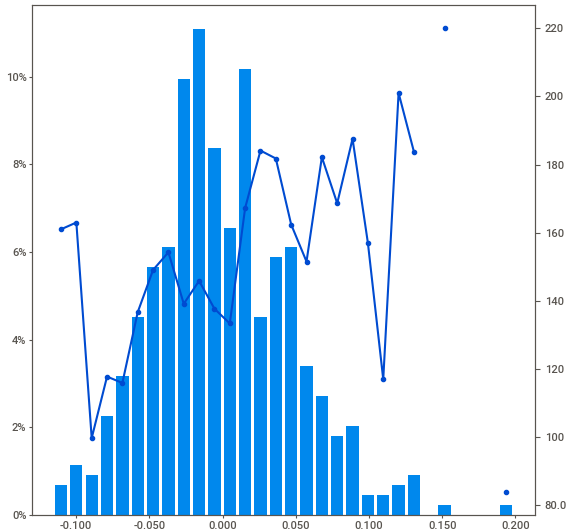
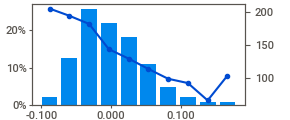
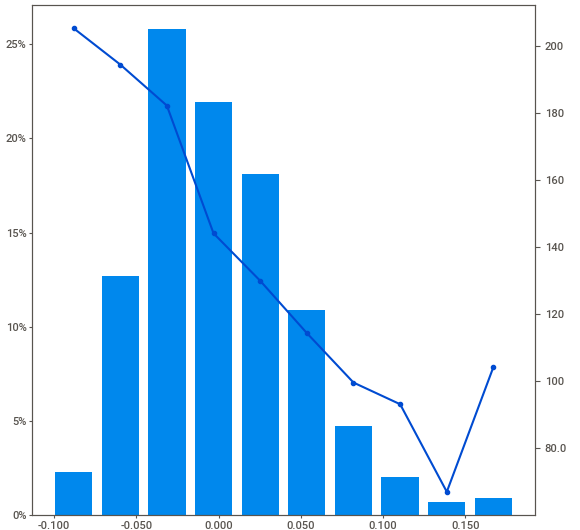
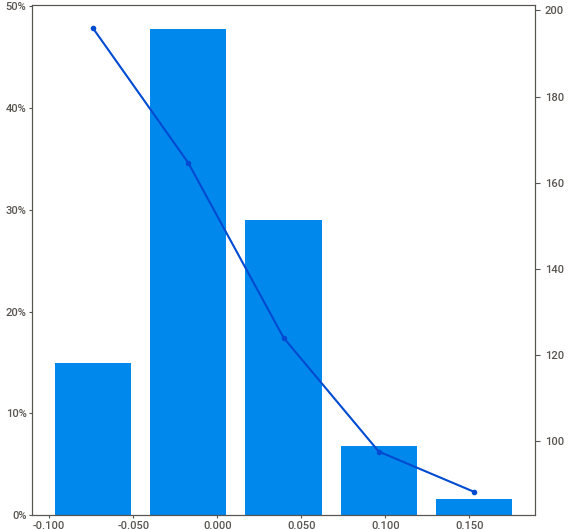
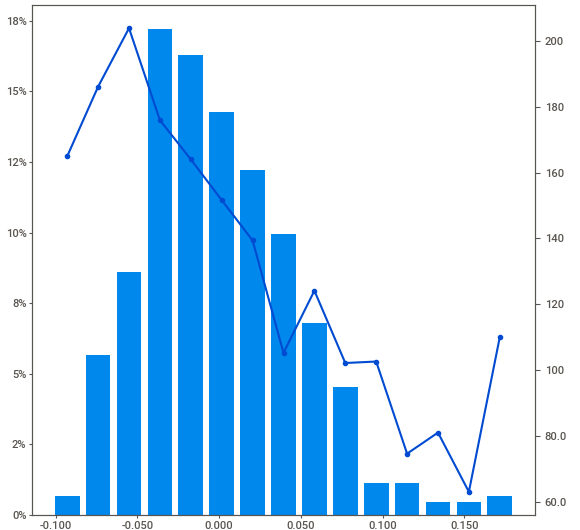
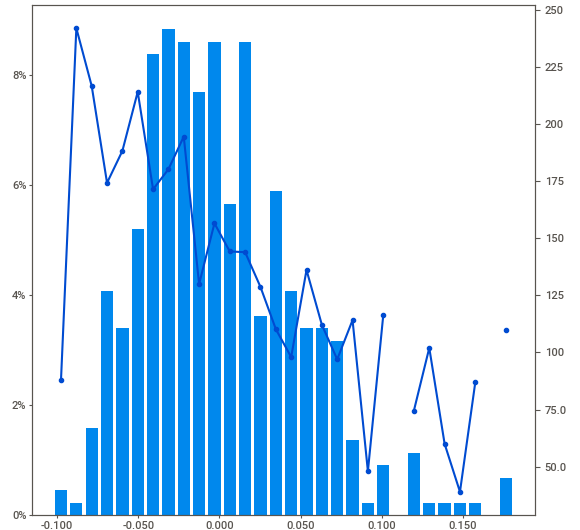
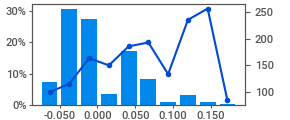
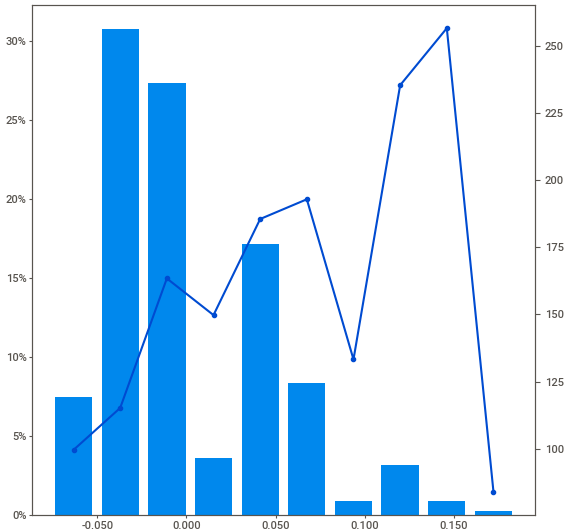
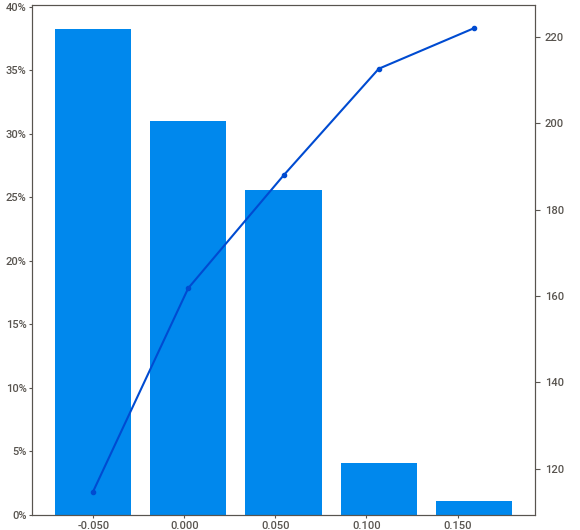
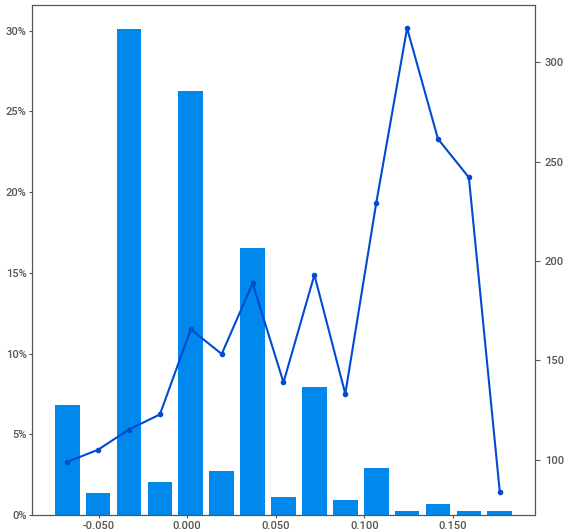
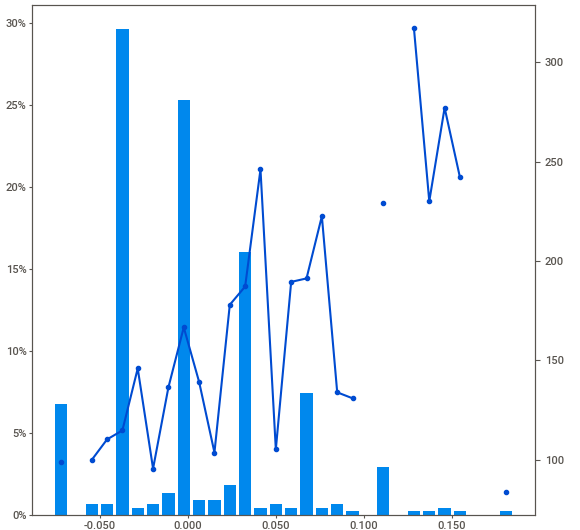
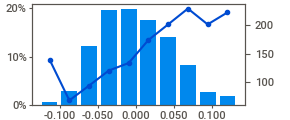
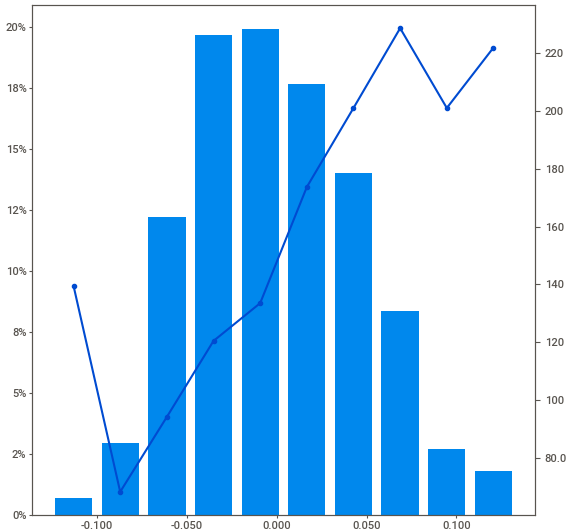
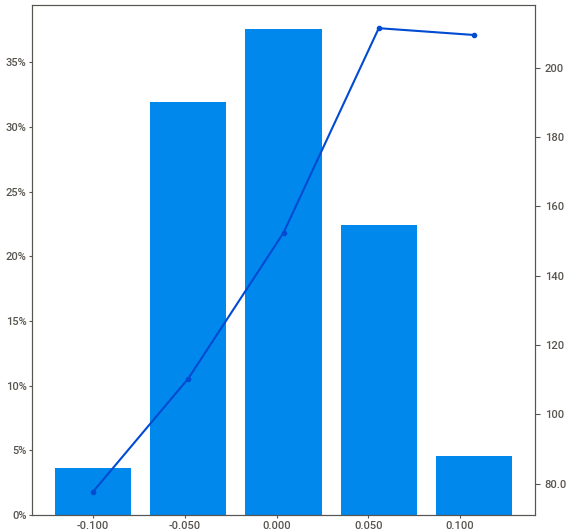
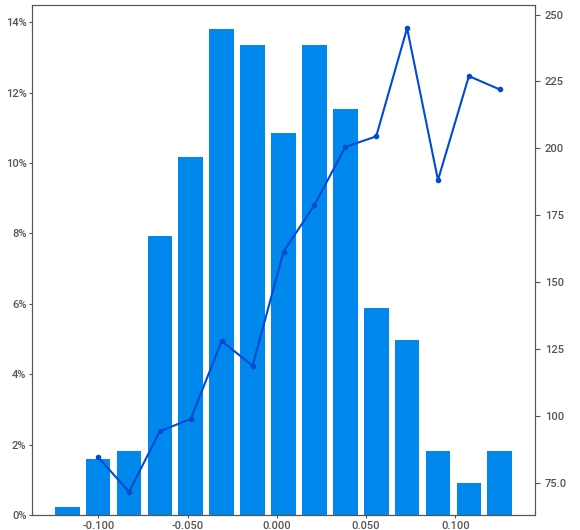
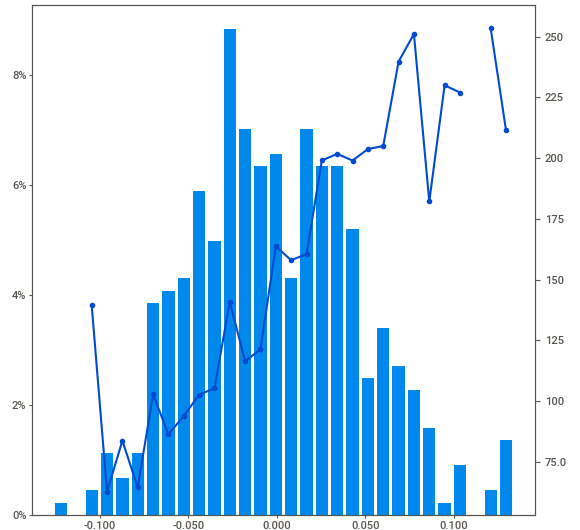
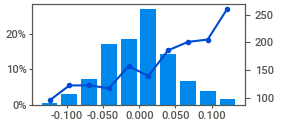
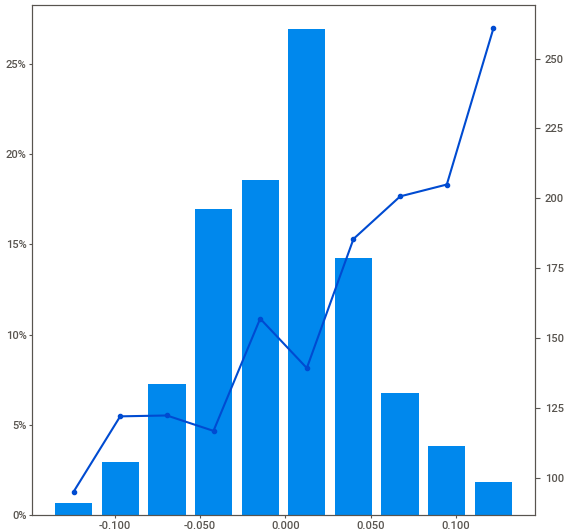
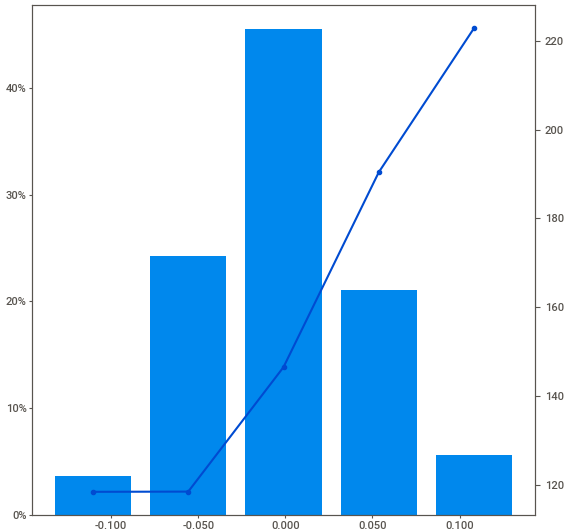
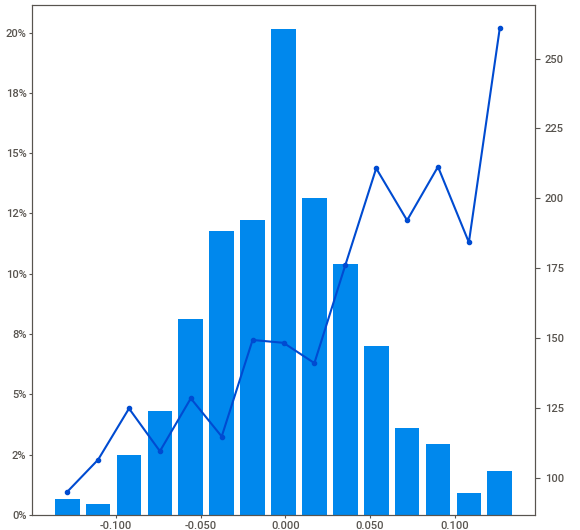
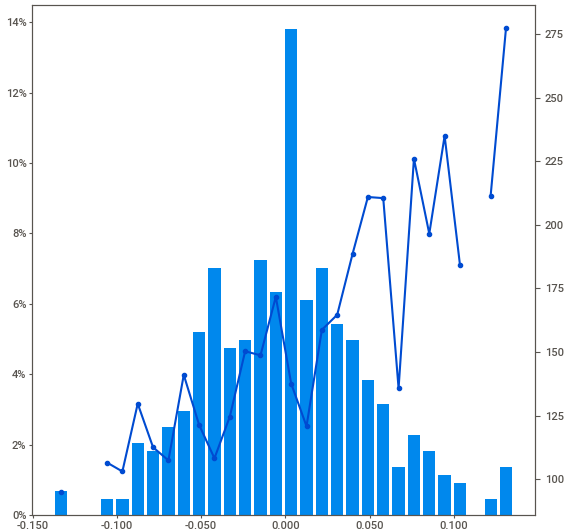
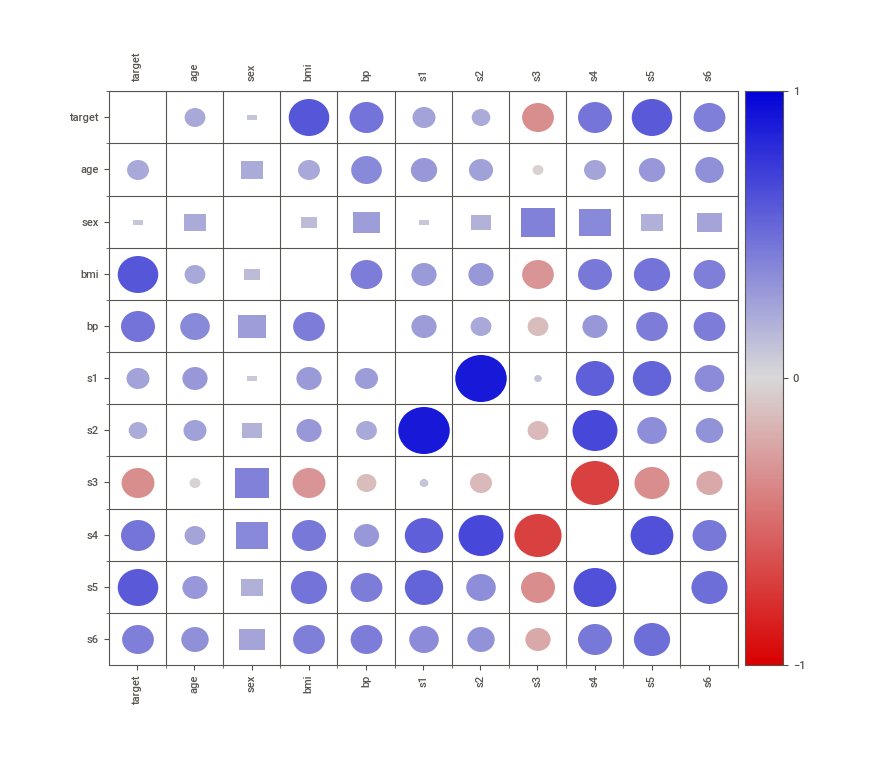
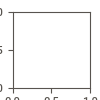

In [9]:
report.show_notebook()

#### > Boxplots - Outlier detection 

In [10]:
df.columns.to_list()

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target']

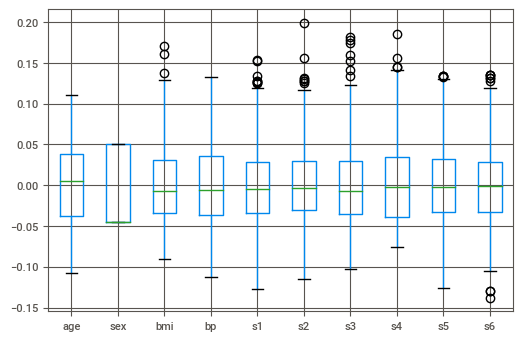

In [11]:
boxplot = df.boxplot(column = df.columns.to_list()[:-1])


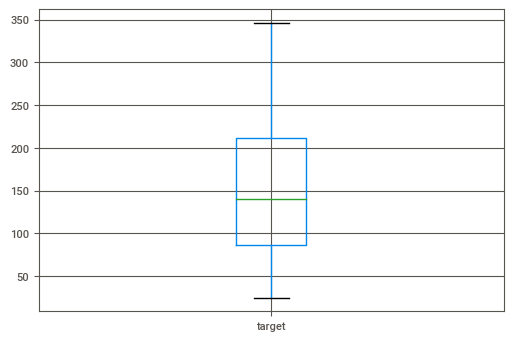

In [12]:
boxplot = df.boxplot(column = df.columns.to_list()[-1])

Outliers are observed in attributes: bmi, s1, s2, s3, s4 and s6. A threshold can be set at 0.15

In [13]:
df[(df['bmi'] >= 0.15) | (df['s1'] >= 0.15) | (df ['s2']>=0.15) | (df['s3']>=0.15) | (df['s4']>= 0.15)]

age       sex       bmi        bp        s1        s2        s3  \
58   0.041708 -0.044642 -0.064408  0.035644  0.012191 -0.057994  0.181179   
123  0.005383  0.050680  0.034751 -0.001080  0.152538  0.198788 -0.061809   
230 -0.038207  0.050680  0.071397 -0.057314  0.153914  0.155887  0.000779   
256 -0.049105 -0.044642  0.160855 -0.046985 -0.029088 -0.019790 -0.047082   
260  0.041708 -0.044642 -0.008362 -0.057314  0.008063 -0.031376  0.151726   
261  0.048974 -0.044642 -0.041774  0.104501  0.035582 -0.025739  0.177497   
269  0.009016 -0.044642 -0.032073 -0.026328  0.042462 -0.010395  0.159089   
322  0.023546  0.050680  0.061696  0.062039  0.024574 -0.036073 -0.091262   
367 -0.009147  0.050680  0.170555  0.014987  0.030078  0.033759 -0.021311   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6  target  
58  -0.076395 -0.000609 -0.050783   170.0  
123  0.185234  0.015567  0.073480    84.0  
230  0.071948  0.050276  0.069338   220.0  
256  0.034309  0.028017  0.011349   346.0  
260 -0.076395 -0.080237 -0.017646    39.0  
261 -0.076395 -0.012908  0.015491   103.0  
269 -0.076395 -0.011901 -0.038357    87.0  
322  0.155345  0.133396  0.081764   242.0  
367  0.034309  0.033657  0.032059   242.0  
441 -0.039493 -0.004220  0.003064    57.0

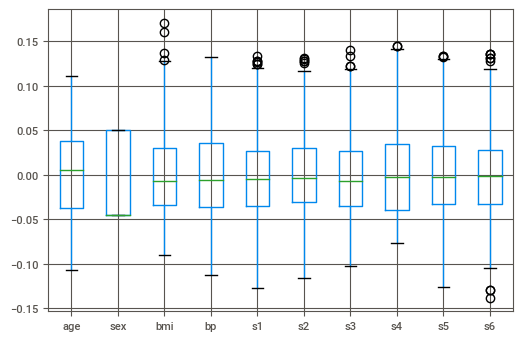

In [14]:
flag = (df['s1'] >= 0.15) | (df ['s2']>=0.15) | (df['s3']>=0.15) | (df['s4']>= 0.15)
outliers_removed = df[~flag]
boxplot = outliers_removed.boxplot(column = df.columns.to_list()[:-1])


#### These attributes represent cholesterol, as well as other blood measurements, which can be considered accurate, with low probability of invalid measurements. Follow that, and the fact that we do not have absolute measurements of attributes in order to make use of domain knowledge and evaluate the validity of these measurements, we will not proceed into any outlier transformation (drop or transform these records)

### > Scatter plots
#### > Computation of correlation coefficient (Pearson's r for numerical variables (range from -1 to 1))
#### > Correlation matrix (included in Sweetviz report)
Note that correlation coefficient only measures linear correlations (“if x
goes up, then y generally goes up/down”). It may completely miss
out on nonlinear relationships (e.g., “if x is close to 0, then y gener‐
ally goes up”). 

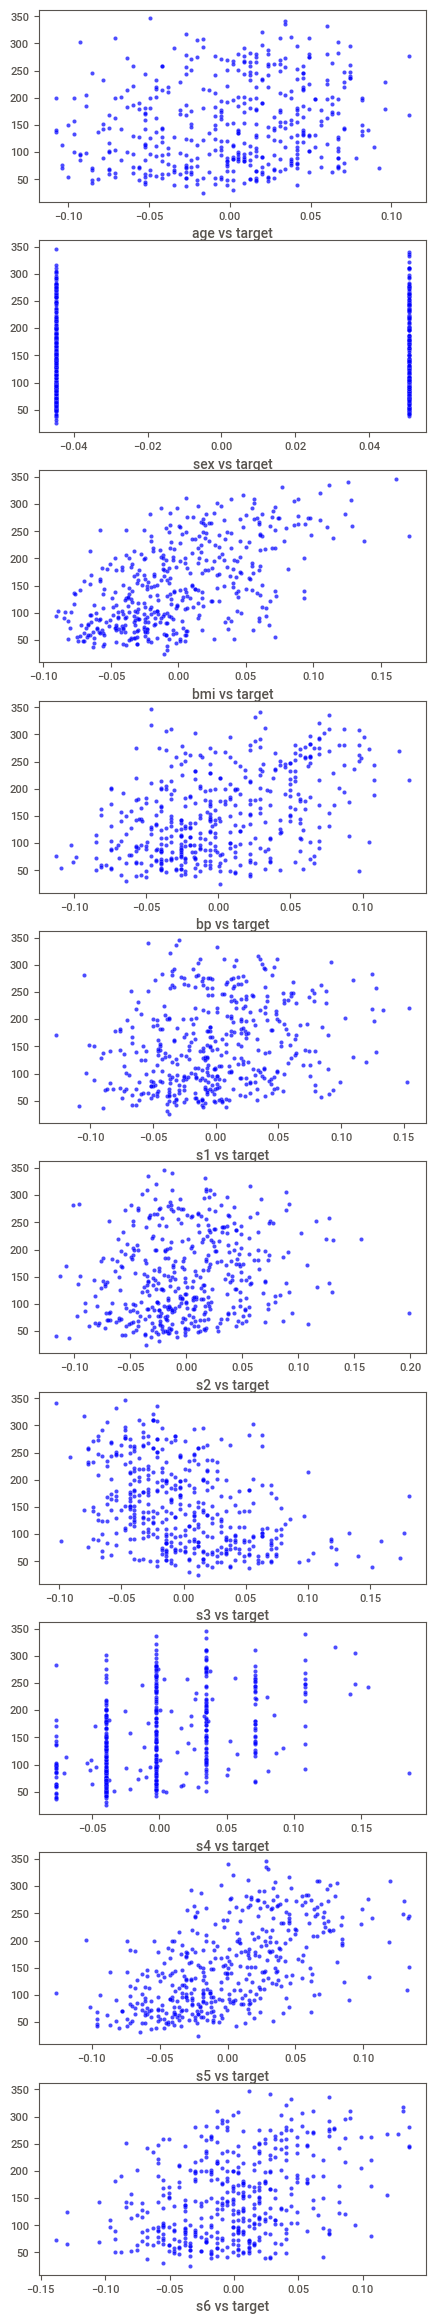

In [15]:
fig, ax = plt.subplots(10, figsize=(5, 30))
i = 0 
for elem in df.columns:
    if elem == 'target':
        break
    ax[i].scatter(x = df[elem], y = df['target'], color = "blue", edgecolors = "white", linewidths = 0.1, alpha = 0.7)
    ax[i].set_xlabel(f"{elem} vs target")
    i += 1
plt.show()


In [16]:
corr_matrix = df.corr()
corr_matrix['target'].sort_values(ascending=False)

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441484
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64

It is observed that bmi, s5, bp and s4 are positive correlated with target variable.
Also sex does not seem to have direct impact on target variable, although it may have some indirect impact, that means it may influence variables that are correlated with target variable. 

Back to sweetviz report (Association provides a correlation matrix for each attribute)


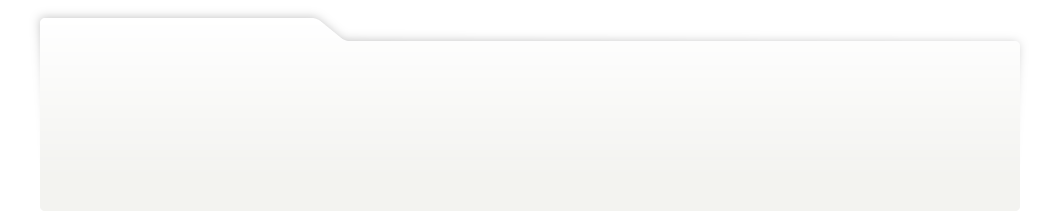
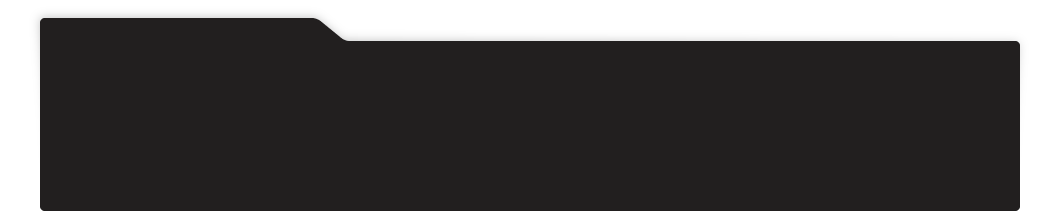
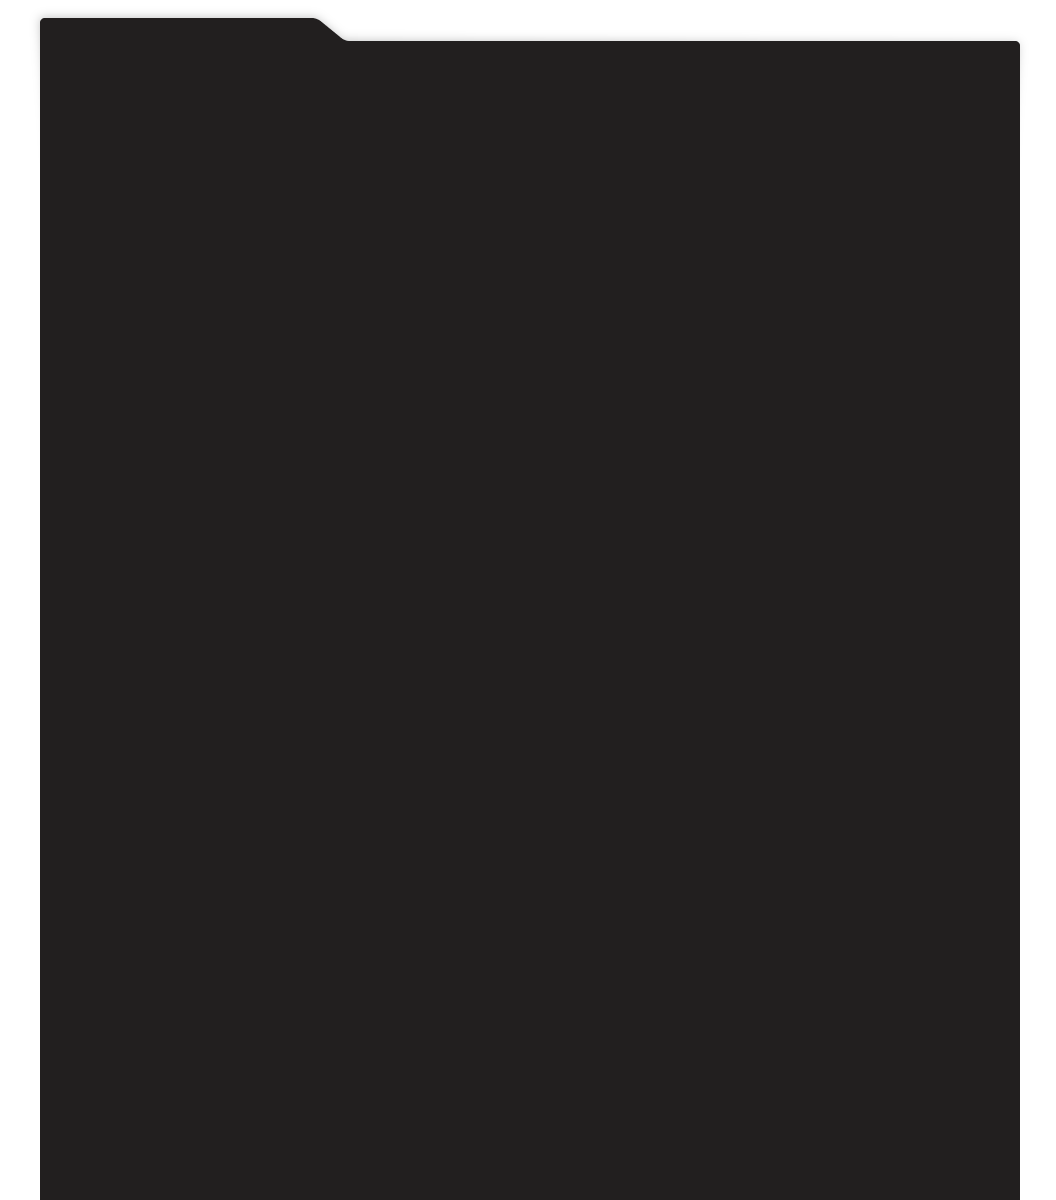
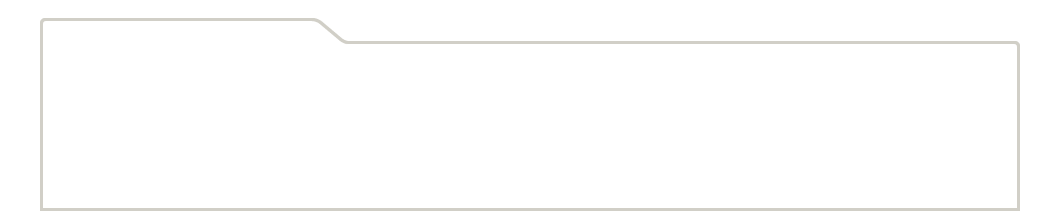
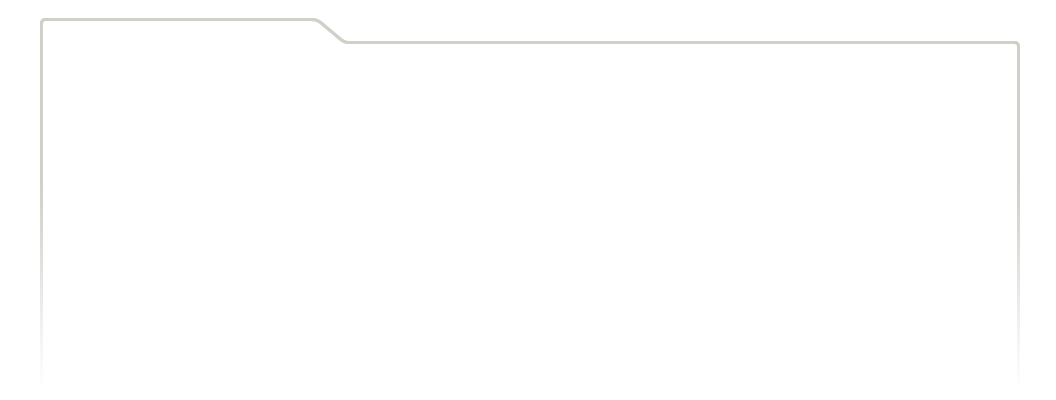
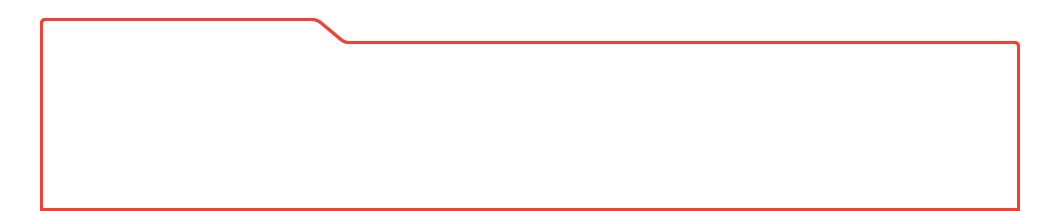
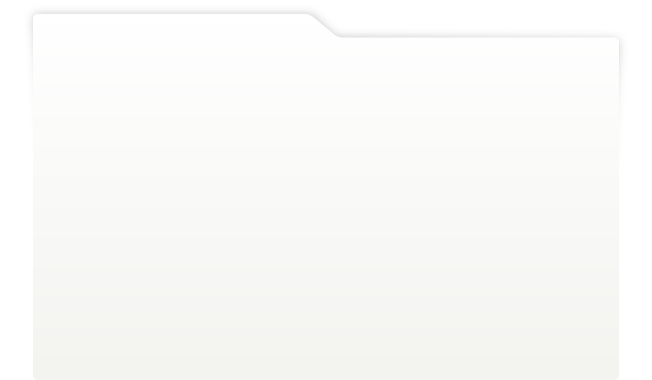
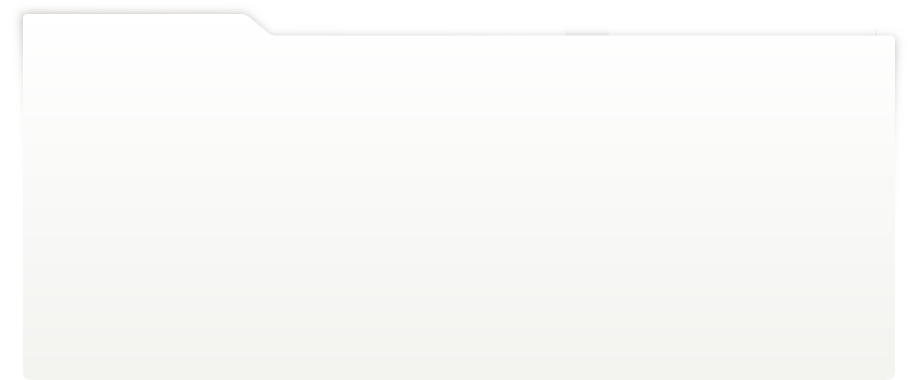
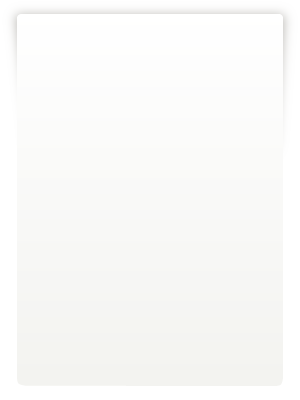
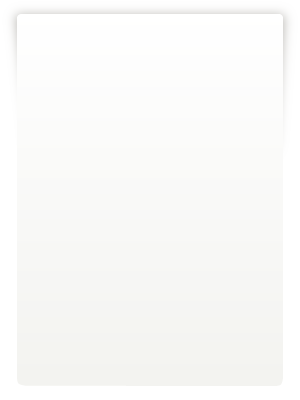
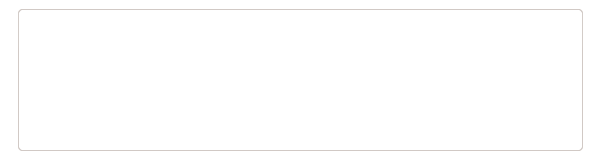
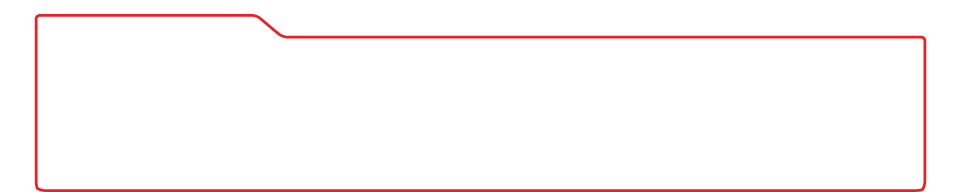
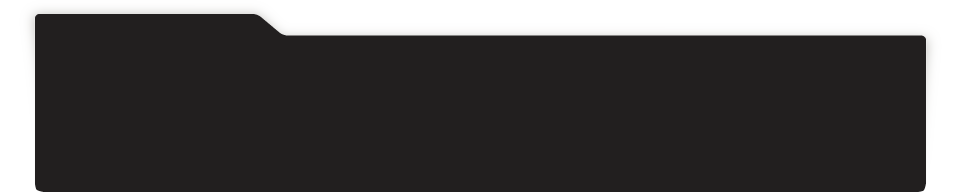
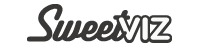
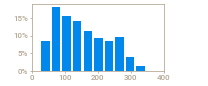
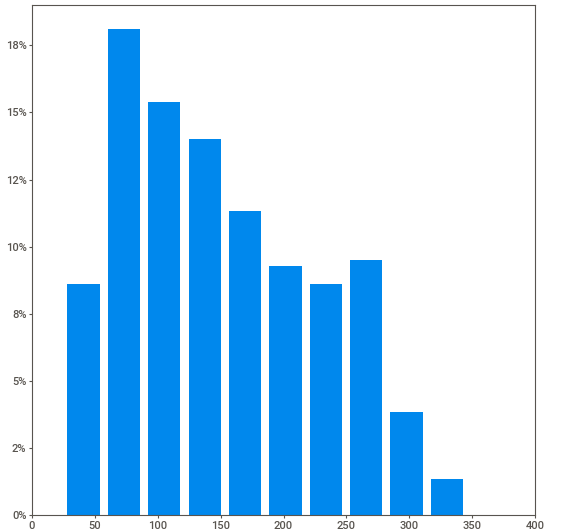
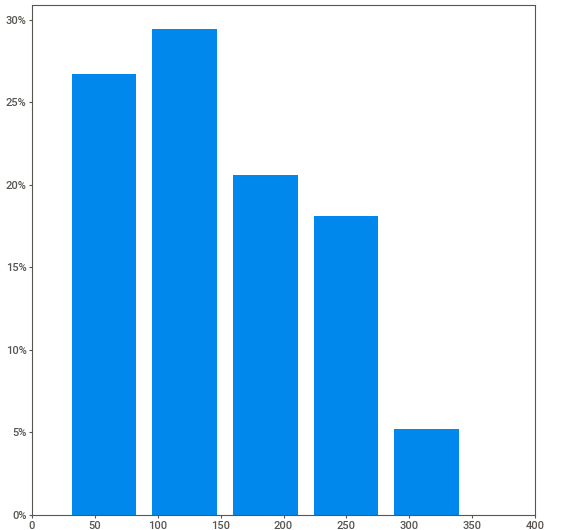
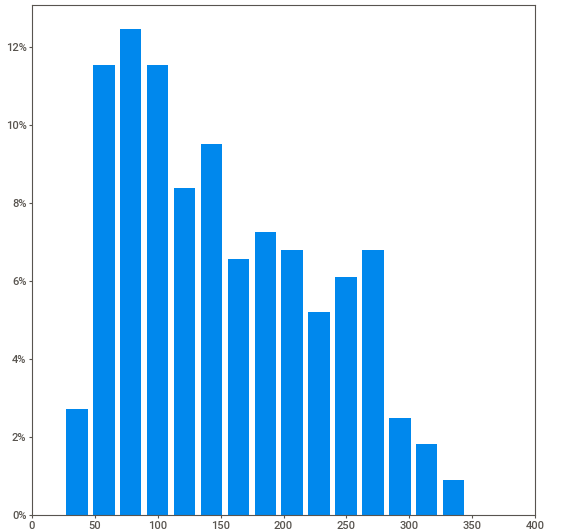
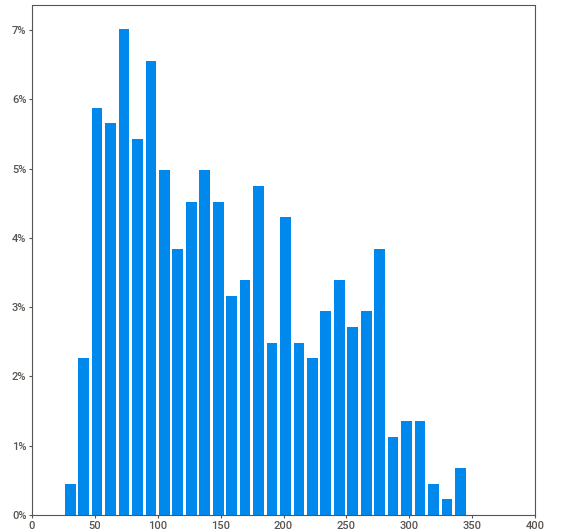
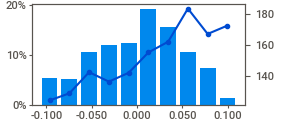
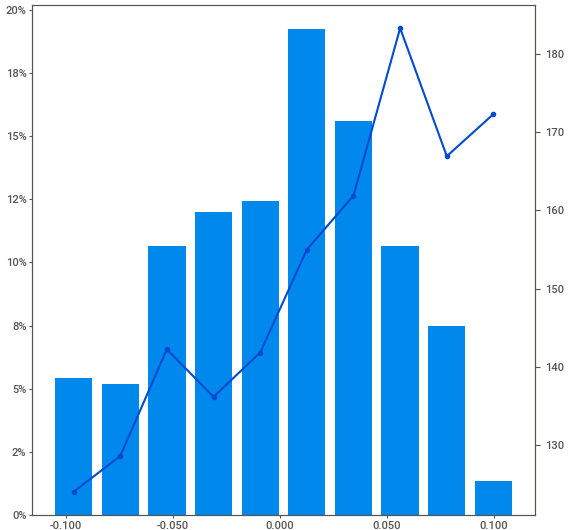
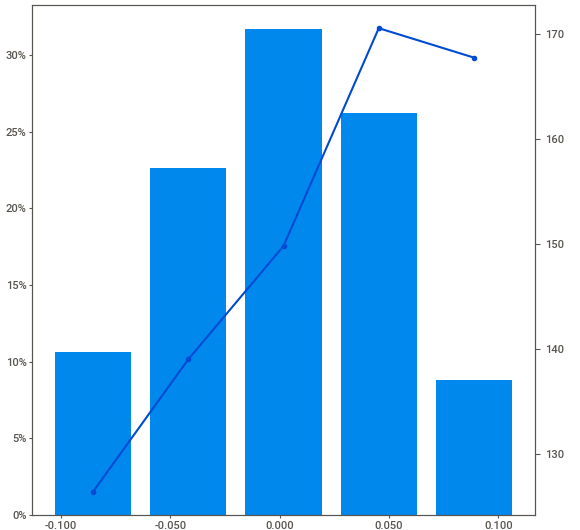
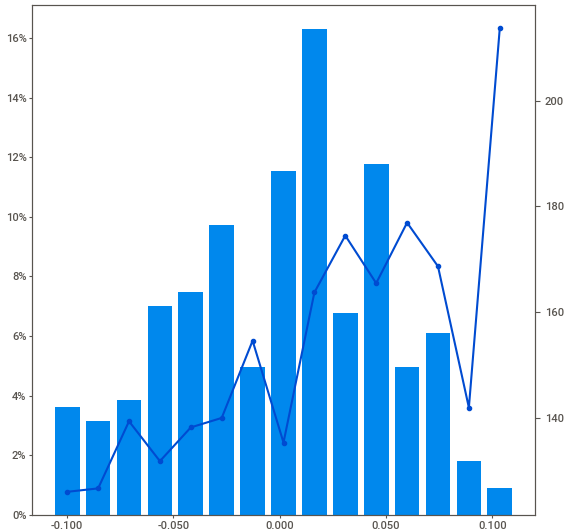
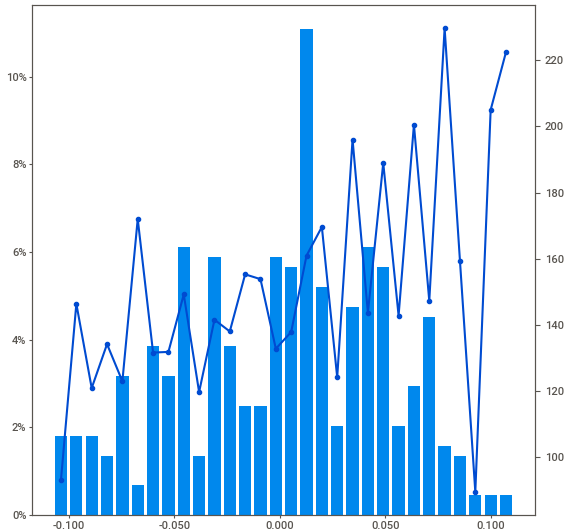
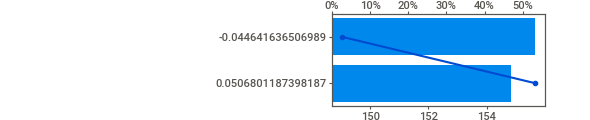
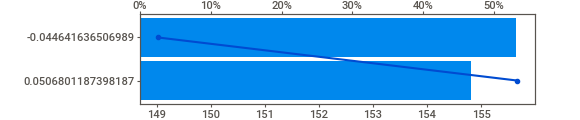
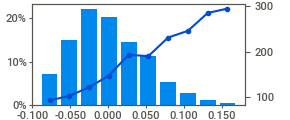
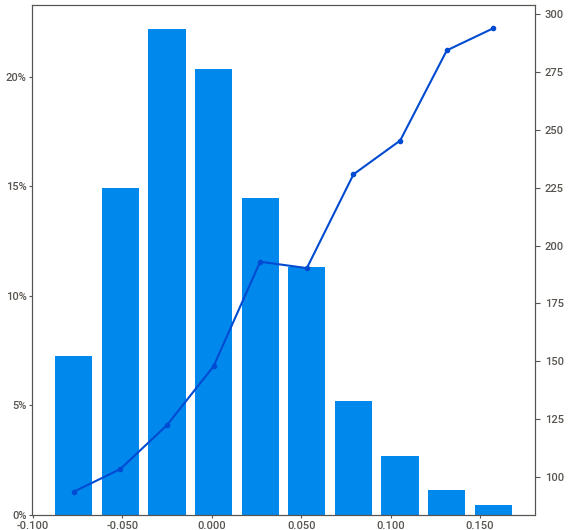
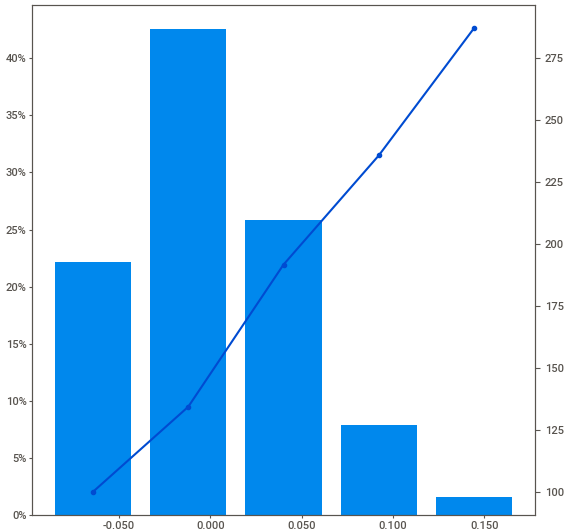
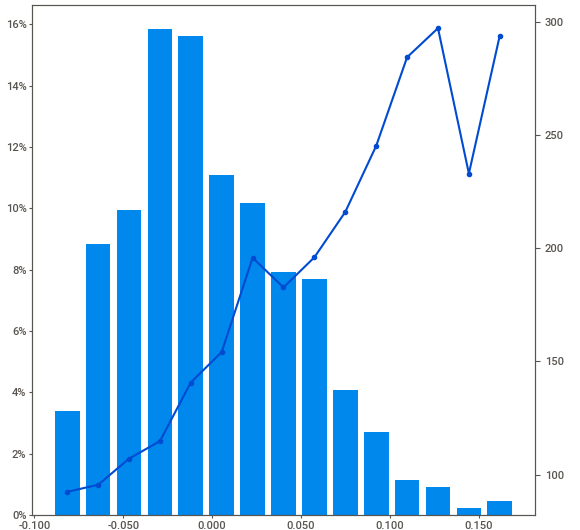
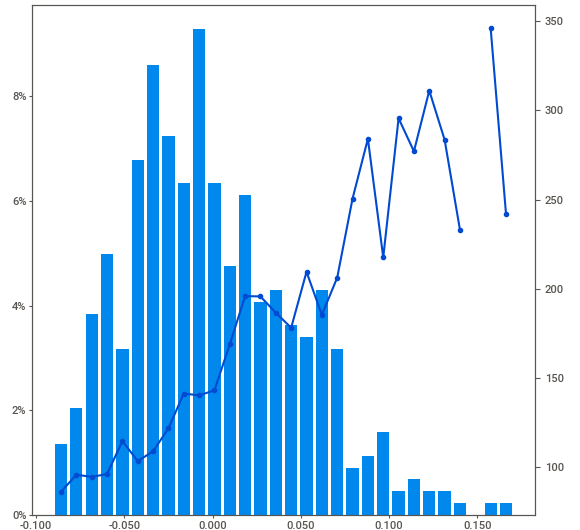
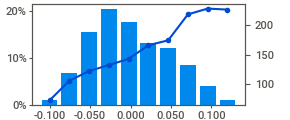
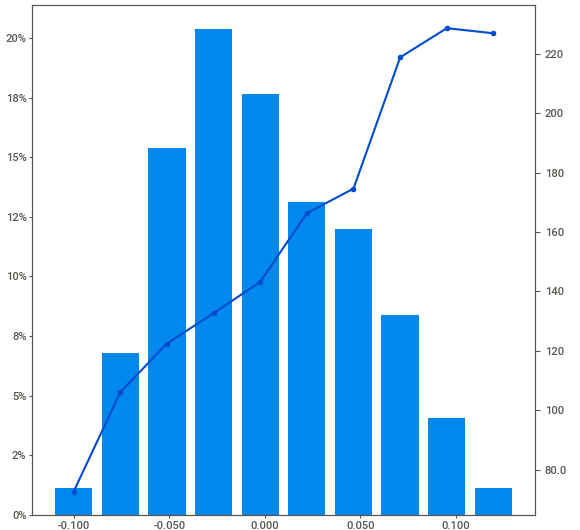
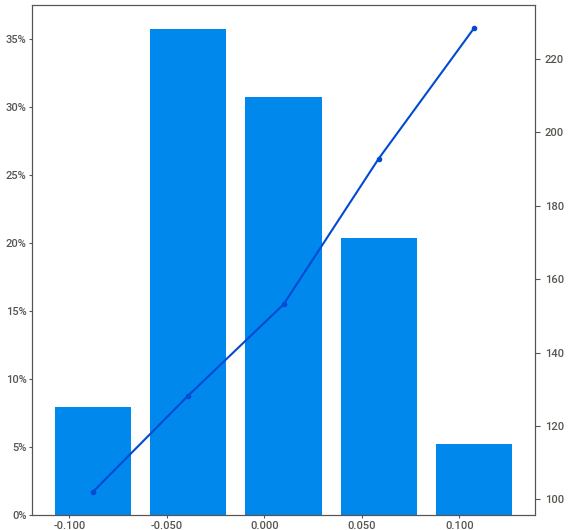
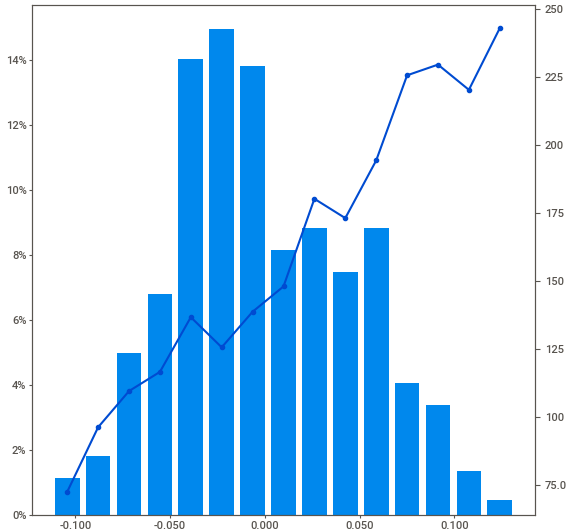
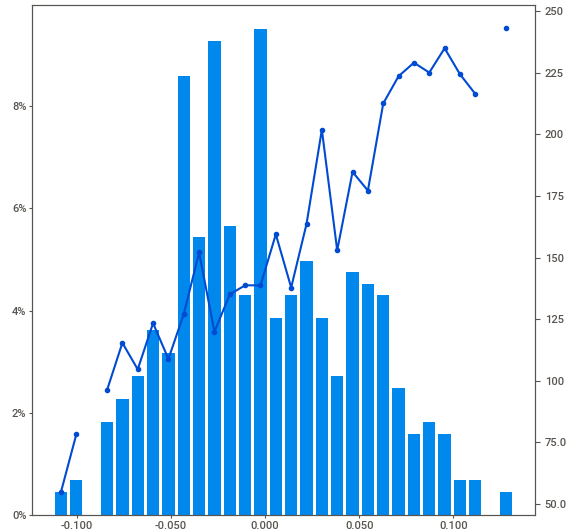
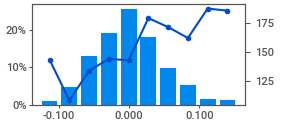
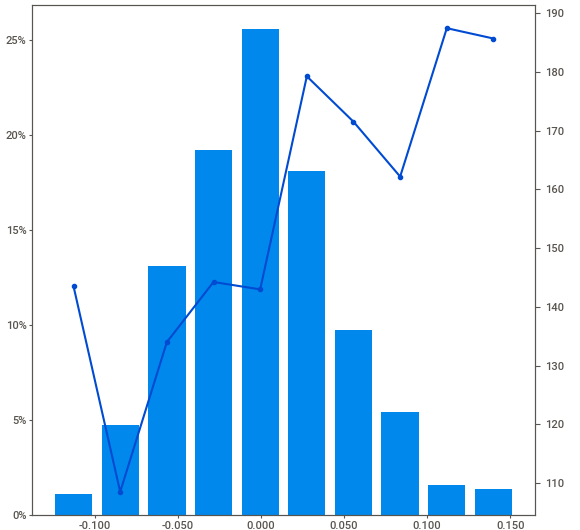
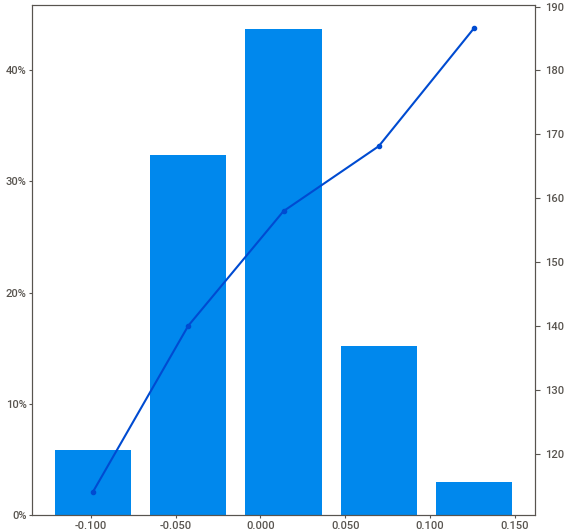
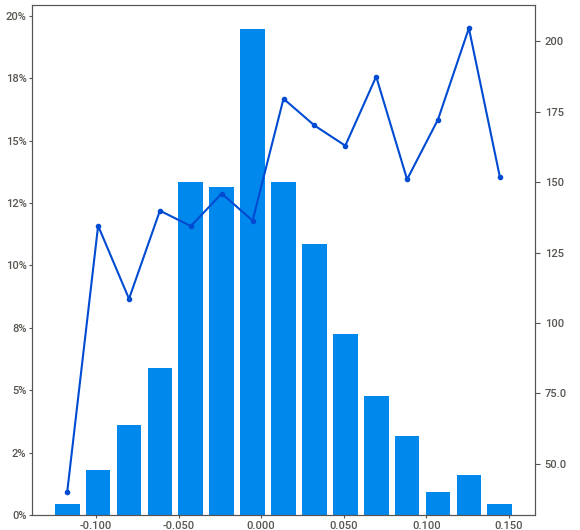
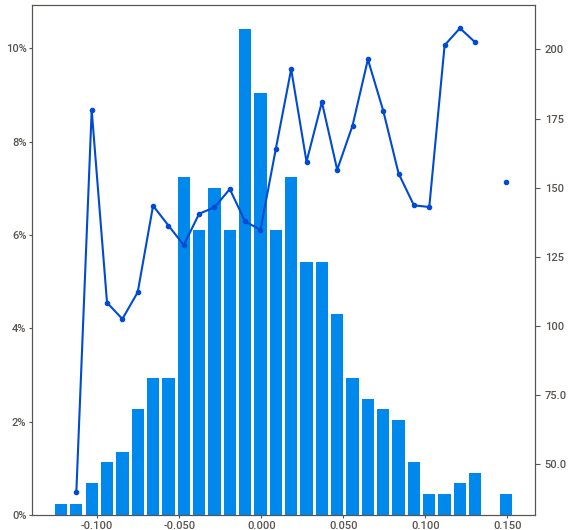
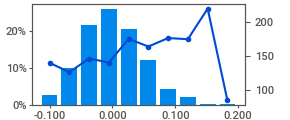
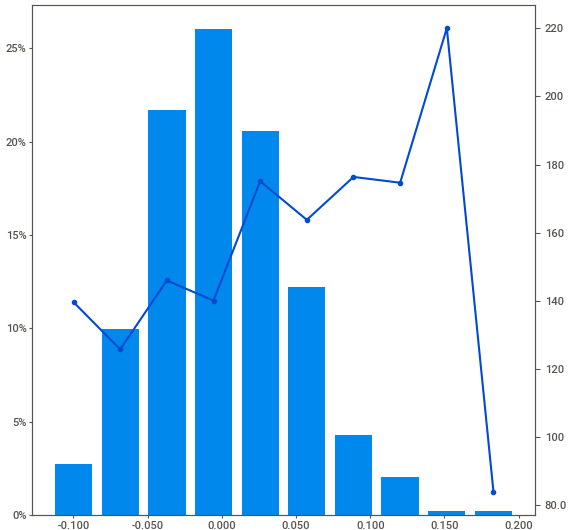
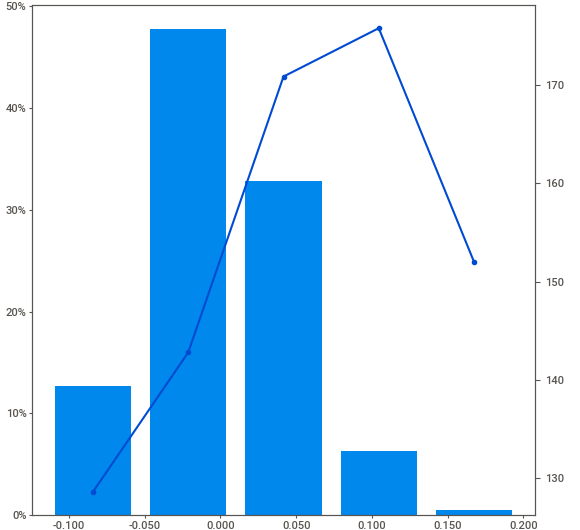
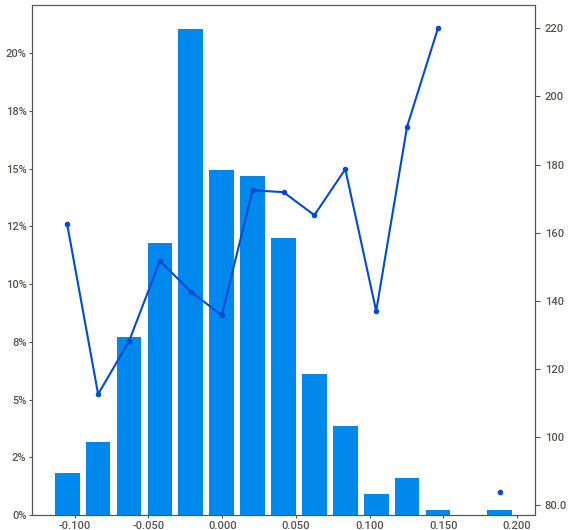
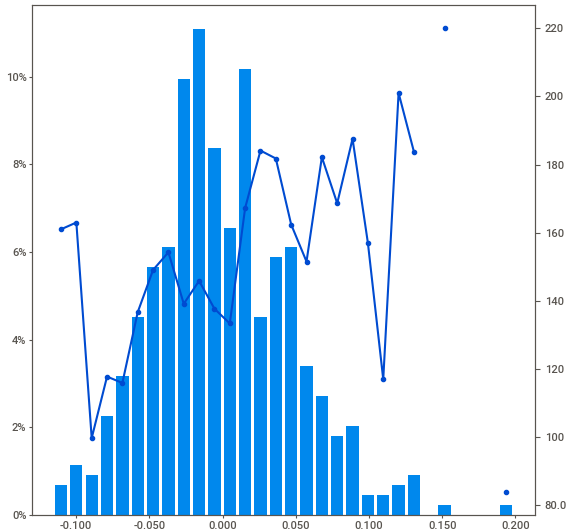
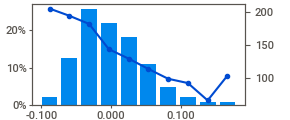
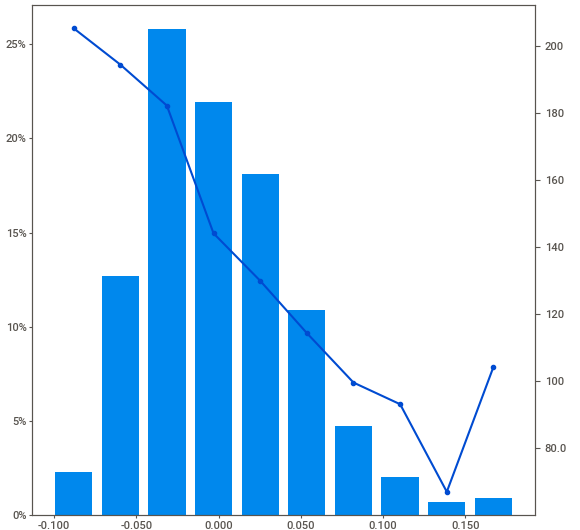
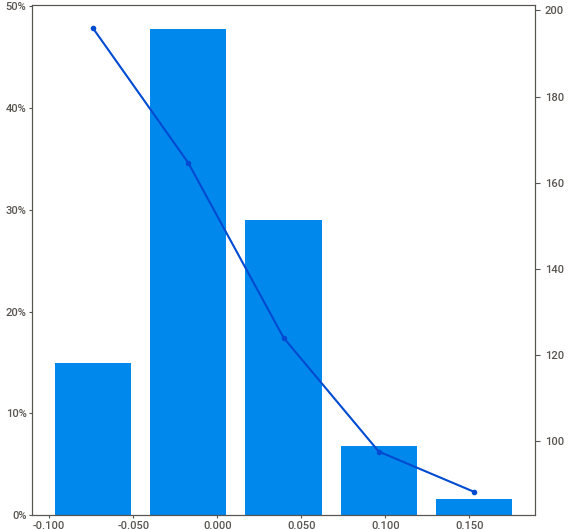
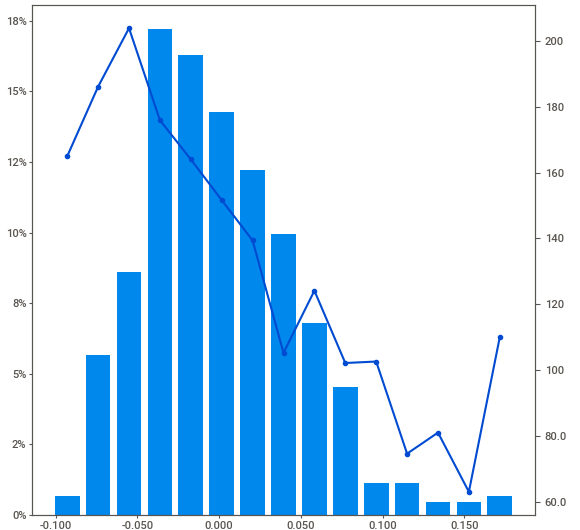
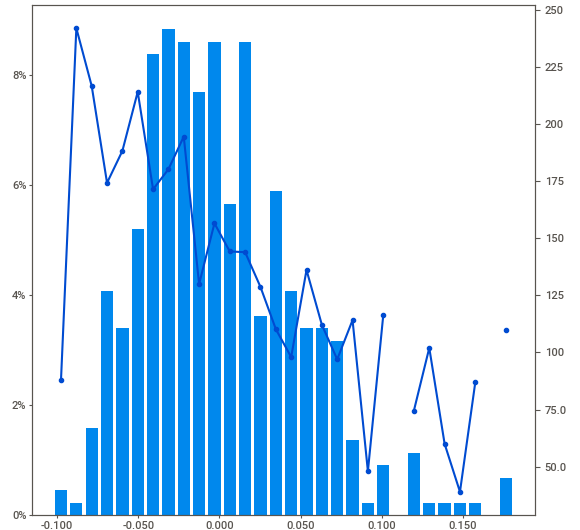
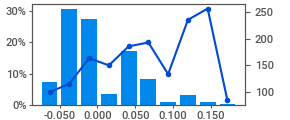
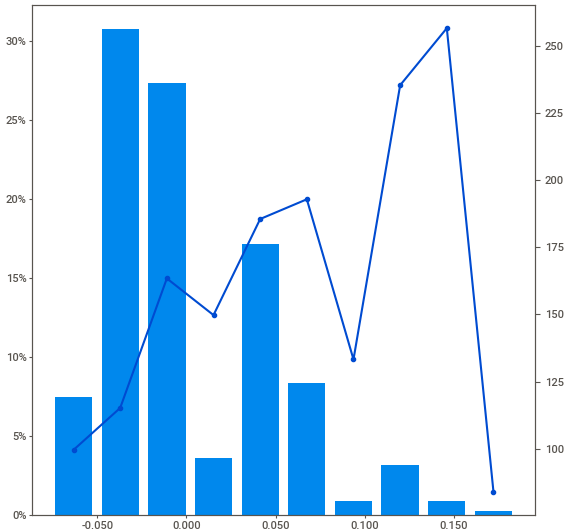
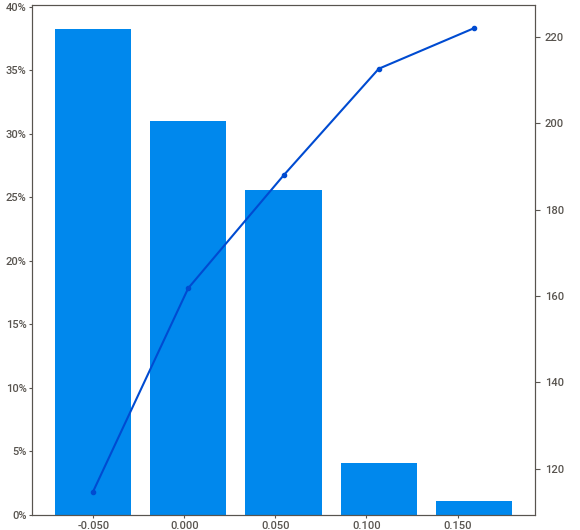
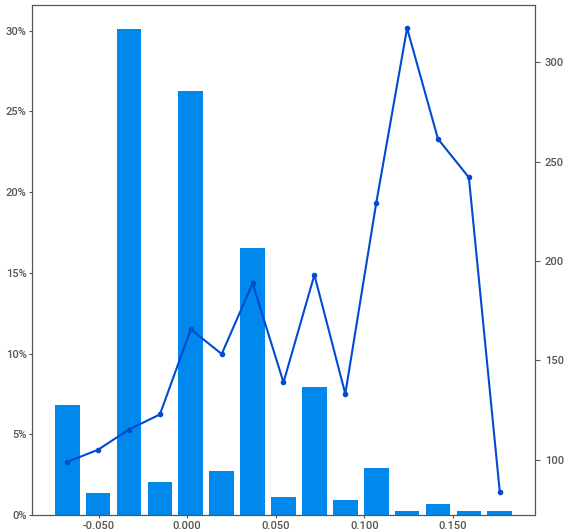
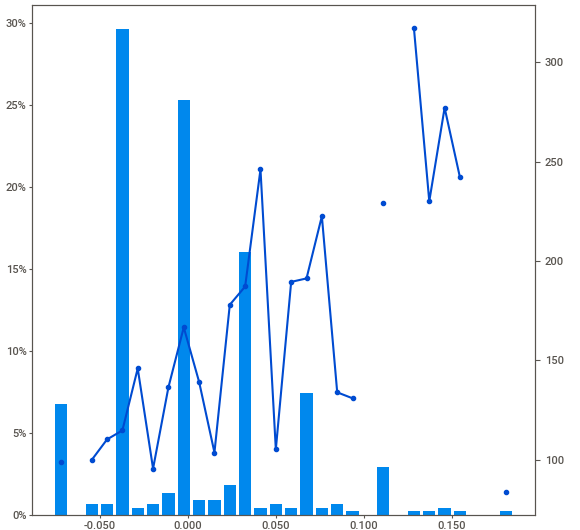
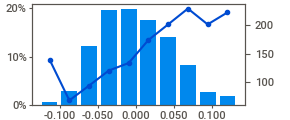
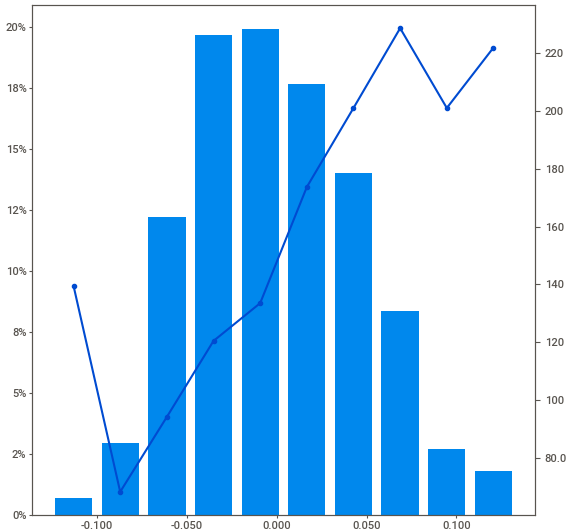
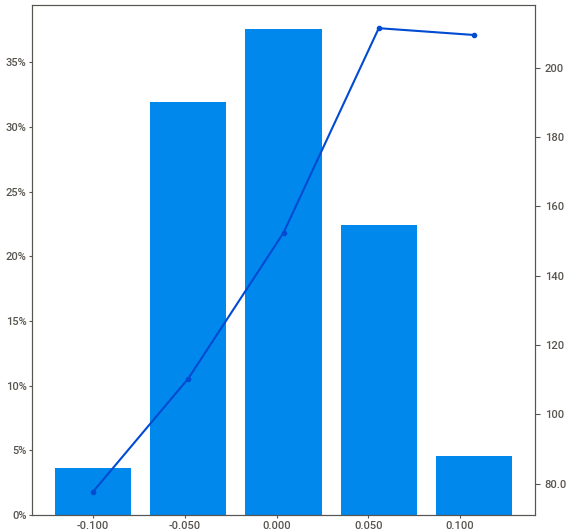
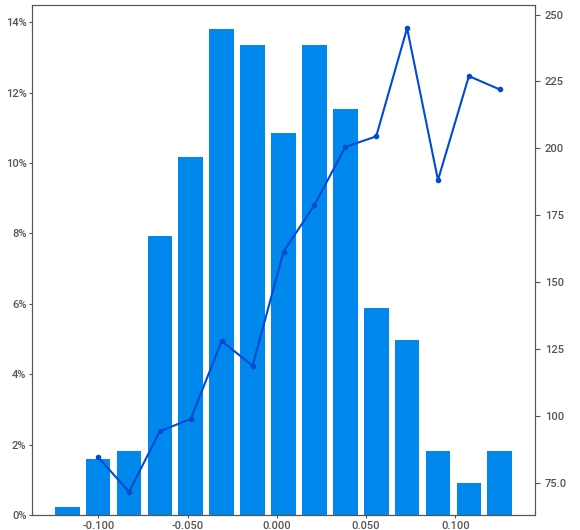
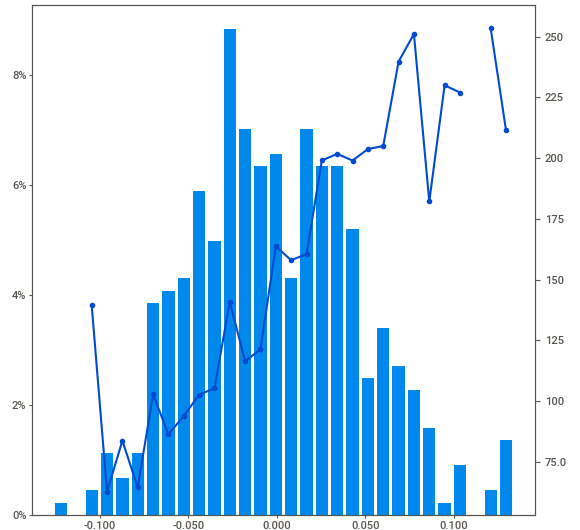
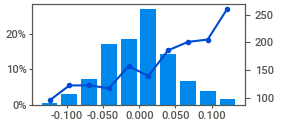
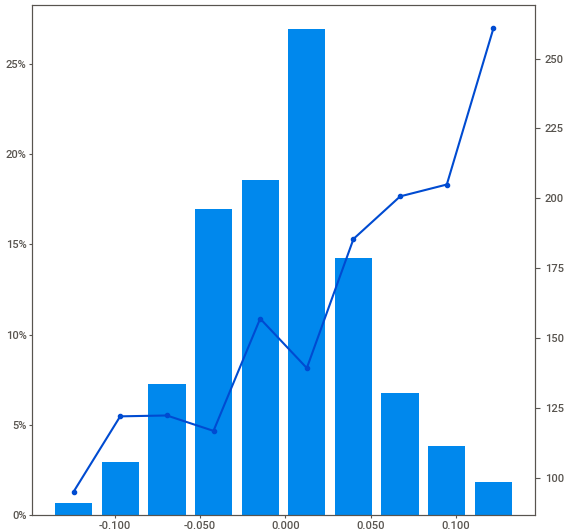
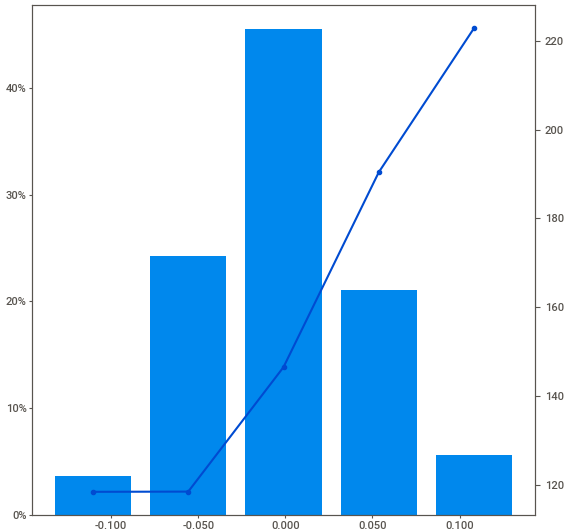
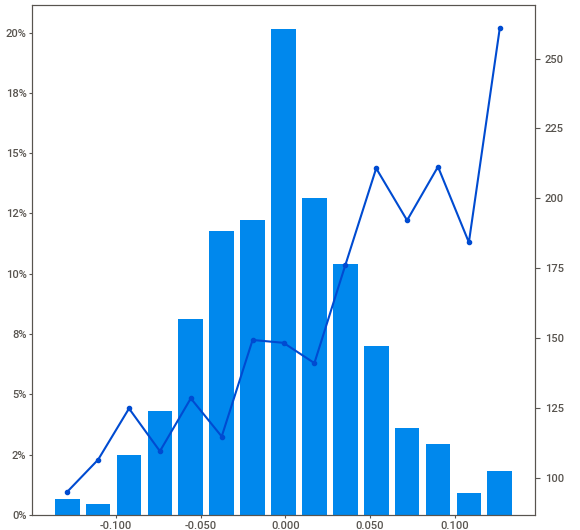
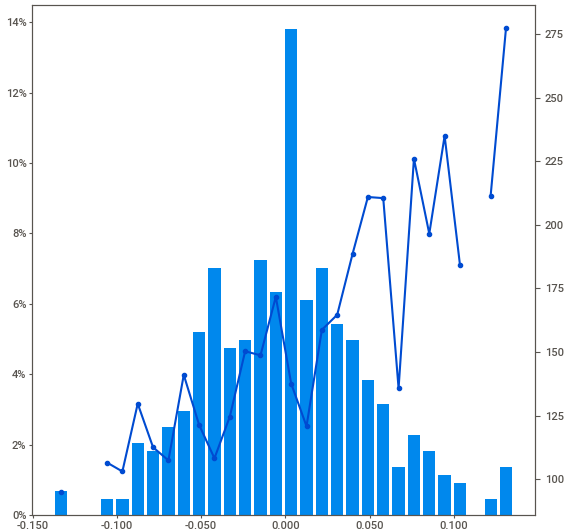
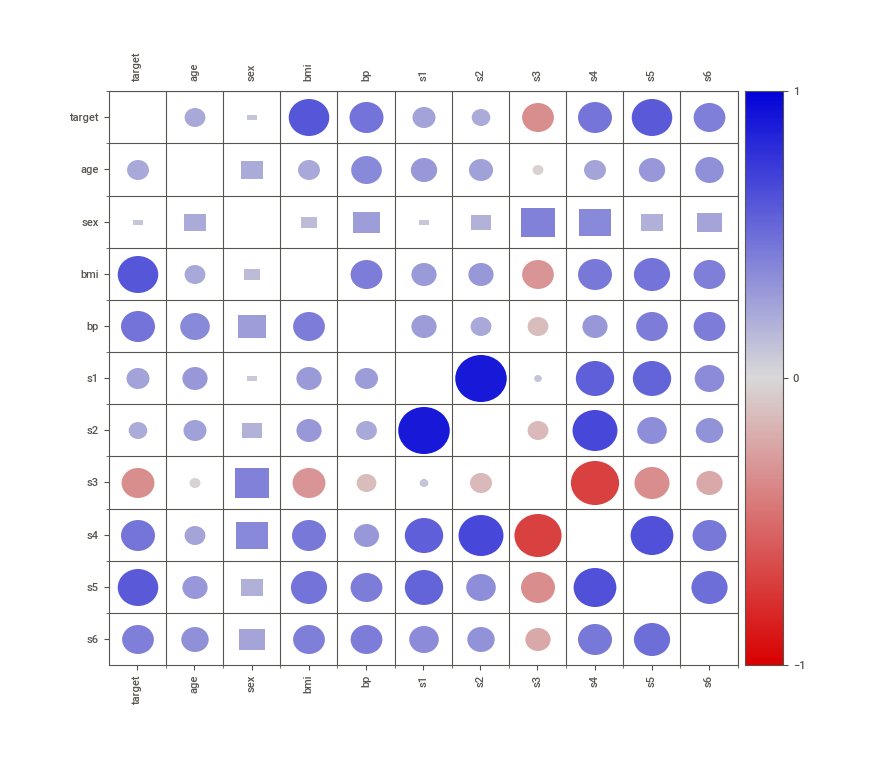
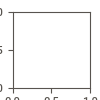

In [17]:
report.show_notebook()

### ===========================
## STEP 4
### > Feature Engineering
(E.x Remove highly correlated attributes, Experimenting with Attribute Combinations,encoding e.t.c) 
### ===========================

Beginning by encoding, the only categorical attribute is sex. As seen, it is a binary variable (has 2 possible values).

$\textbf{One hot encoding}$ can be used, since it will not increase the number of columns in the dataframe.

Assumption: -0.044642 represents Females and 0.050680 represents males.

In [18]:
from sklearn.preprocessing import OneHotEncoder
def oe_encoding(df, column):
    oe_style = OneHotEncoder()
    oe_results = oe_style.fit_transform(df[[column]])
    df = df.join(pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_))
    df.rename(columns = {df.columns[-1]:'M', df.columns[-2]:'F'}, inplace = True)
    df.drop(column, inplace=True, axis=1)
    return df 

df = oe_encoding(df, 'sex')

In [19]:
df.head()

age       bmi        bp        s1        s2        s3        s4  \
0  0.038076  0.061696  0.021872 -0.044223 -0.034821 -0.043401 -0.002592   
1 -0.001882 -0.051474 -0.026328 -0.008449 -0.019163  0.074412 -0.039493   
2  0.085299  0.044451 -0.005671 -0.045599 -0.034194 -0.032356 -0.002592   
3 -0.089063 -0.011595 -0.036656  0.012191  0.024991 -0.036038  0.034309   
4  0.005383 -0.036385  0.021872  0.003935  0.015596  0.008142 -0.002592   

         s5        s6  target    F    M  
0  0.019908 -0.017646   151.0  0.0  1.0  
1 -0.068330 -0.092204    75.0  1.0  0.0  
2  0.002864 -0.025930   141.0  0.0  1.0  
3  0.022692 -0.009362   206.0  1.0  0.0  
4 -0.031991 -0.046641   135.0  1.0  0.0

#### Correlation between attributes

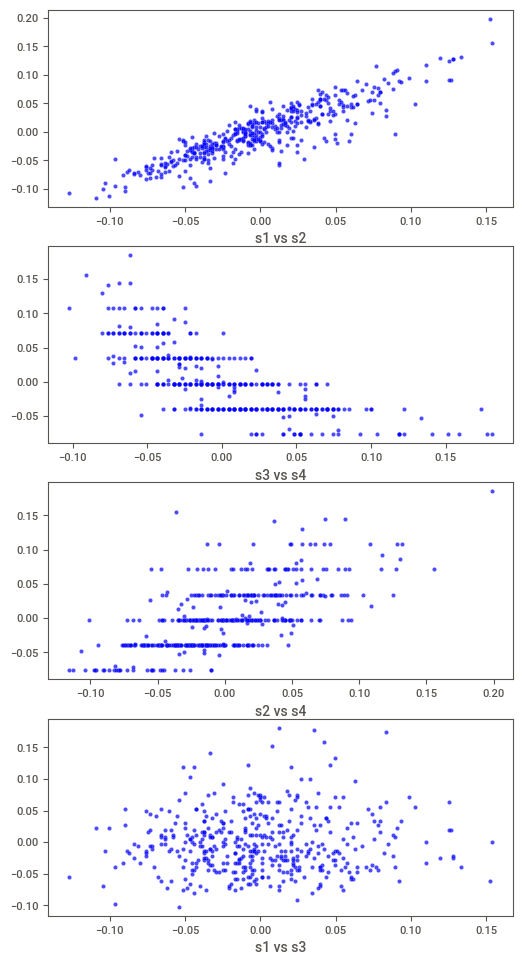

In [20]:
fig, ax = plt.subplots(4, figsize=(6, 12))
ax[0].scatter(x = df['s1'], y = df['s2'], color = "blue", edgecolors = "white", linewidths = 0.1, alpha = 0.7)
ax[0].set_xlabel("s1 vs s2")

ax[1].scatter(x = df['s3'], y = df['s4'], color = "blue", edgecolors = "white", linewidths = 0.1, alpha = 0.7)
ax[1].set_xlabel("s3 vs s4")

ax[2].scatter(x = df['s2'], y = df['s4'], color = "blue", edgecolors = "white", linewidths = 0.1, alpha = 0.7)
ax[2].set_xlabel("s2 vs s4")

ax[3].scatter(x = df['s1'], y = df['s3'], color = "blue", edgecolors = "white", linewidths = 0.1, alpha = 0.7)
ax[3].set_xlabel("s1 vs s3")
plt.show()


In [21]:
corr_matrix = df.corr()
corr_matrix['s1'].sort_values(ascending=False)[:3]

s1    1.000000
s2    0.896663
s4    0.542207
Name: s1, dtype: float64

In [22]:
corr_matrix = df.corr()
corr_matrix['s3'].sort_values(ascending=True)[:3]

s4       -0.738493
s5       -0.398577
target   -0.394789
Name: s3, dtype: float64

In [23]:
corr_matrix = df.corr()
corr_matrix['target'].sort_values(ascending=False)[:3]

target    1.000000
bmi       0.586450
s5        0.565883
Name: target, dtype: float64

As observed variables s1 and s2 are very highly correlated. It is possible that one of the attributes is redundant and does not provide any additional information that the other attribute does not already capture. Both attributes are positive correlated with target variable. In that case the least correlated (s2) attribute could be removed, in order to avoid collinearity issues.

However, if we intend to add some domain knowledge to this problem, we have to interpret what these atttributes represent.
We have from the dataset description: 
- s1      tc, total serum cholesterol
- s2      ldl, low-density lipoproteins
- s3      hdl, high-density lipoproteins
- s5      ltg, possibly log of serum triglycerides level

`` Total serum cholesterol is a measure of the total amount of cholesterol in the blood, including both LDL and HDL cholesterol.
People can calculate their total cholesterol by combining the figures from several blood tests. According to the AHATrusted Source, this involves adding a person’s HDL cholesterol level, LDL cholesterol level, and 20% of their triglyceride level. ``

SOURCE: https://www.medicalnewstoday.com/articles/how-to-calculate-total-cholesterol#how-to-calculate


With that being said, information from s1 is derived from attributes s2, s3, s4. We could test this if data were not trasnformed (as we cannot turn back to the original transformation). 

Taking this for granted, s1 attribute seems obsolete, so it can be removed from this dataset.

In addition:
- s3      hdl, high-density lipoproteins
- s4      tch, total cholesterol / HDL

Information from s4 can be derived from s3 variable (and s1, s2), so it can also be removed.

In [24]:
df.drop('s1', inplace=True, axis=1)
df.drop('s4', inplace=True, axis=1)

In [25]:
print(f"target variable ranges:[{df['target'].min()}, {df['target'].max()}]")



target variable ranges:[25.0, 346.0]


While attribute have a range [-0.15, 0.15]


If the scale of the target variable is significantly different from the scale of the attributes, it can affect the performance of the model.


### Standardize target variable
#### Target has ranges 
Apply transformation:
$$ y =\frac{x-\mu}{\sigma} $$

In [26]:
df['target_std'] = (df['target'] - df['target'].mean())/ (df['target'].std())
df.head() 


age       bmi        bp        s2        s3        s5        s6  \
0  0.038076  0.061696  0.021872 -0.034821 -0.043401  0.019908 -0.017646   
1 -0.001882 -0.051474 -0.026328 -0.019163  0.074412 -0.068330 -0.092204   
2  0.085299  0.044451 -0.005671 -0.034194 -0.032356  0.002864 -0.025930   
3 -0.089063 -0.011595 -0.036656  0.024991 -0.036038  0.022692 -0.009362   
4  0.005383 -0.036385  0.021872  0.015596  0.008142 -0.031991 -0.046641   

   target    F    M  target_std  
0   151.0  0.0  1.0   -0.014703  
1    75.0  1.0  0.0   -1.000525  
2   141.0  0.0  1.0   -0.144416  
3   206.0  1.0  0.0    0.698721  
4   135.0  1.0  0.0   -0.222244

### ===========================
## STEP 5
### > Algorithm Selection
First of all, data need to be splitted into training and test set.
### ===========================

## LINEAR REGRESSION
We will first use the simplest model but most interpretable model (linear regression) to fit our data, and evaluate the model 
(on training data first).

In [27]:
corr_matrix = df.corr()
corr_matrix['target_std'].sort_values(ascending=False)

target_std    1.000000
target        1.000000
bmi           0.586450
s5            0.565883
bp            0.441484
s6            0.382483
age           0.187889
s2            0.174054
M             0.043062
F            -0.043062
s3           -0.394789
Name: target_std, dtype: float64

In [28]:
from sklearn.model_selection import train_test_split
#let us import the linear regression from sklearn & create instance of the model.
from sklearn.linear_model import LinearRegression

In [29]:
df.columns

Index(['age', 'bmi', 'bp', 's2', 's3', 's5', 's6', 'target', 'F', 'M',
       'target_std'],
      dtype='object')

In [57]:
X = df[['age', 'bmi', 'bp','s2', 's3', 's5', 's6', 'F', 'M']].values
y = df['target_std'].values

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,random_state=999)


In [59]:
X_train.shape, y_train.shape

((397, 9), (397,))

In [60]:
X_test.shape, y_test.shape

((45, 9), (45,))

In [61]:
lr_model =  LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [62]:
y_train_pred = lr_model.predict(X_train) 

In [63]:
#let us import metrics from sklearn to evaluate the model. Refer https://scikit-learn.org/stable/modules/model_evaluation.html for more details.
from sklearn import metrics as mt
from sklearn.metrics import mean_squared_error

In [67]:
print("1) The model explains,", np.round(mt.explained_variance_score(y_train,y_train_pred)*100,2),"% variance of the target variable")
print("2) The Mean Absolute Error of model is:", np.round(mt.mean_absolute_error(y_train,y_train_pred),2))
print("3) The R-Square score of the model is " , np.round(mt.r2_score(y_train,y_train_pred),2))
print("3) The mean square error on train data is: " , np.round(mean_squared_error(y_train,y_train_pred),2))
     

1) The model explains, 50.7 % variance of the target variable
2) The Mean Absolute Error of model is: 0.57
3) The R-Square score of the model is  0.51
3) The mean square error on train data is:  0.5


According to these metrics, the predictions are not exactly accurate !

In [65]:
import seaborn as sns
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

def linear_assumption(model, features, label):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
    """
    print('Assumption: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

Assumption: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


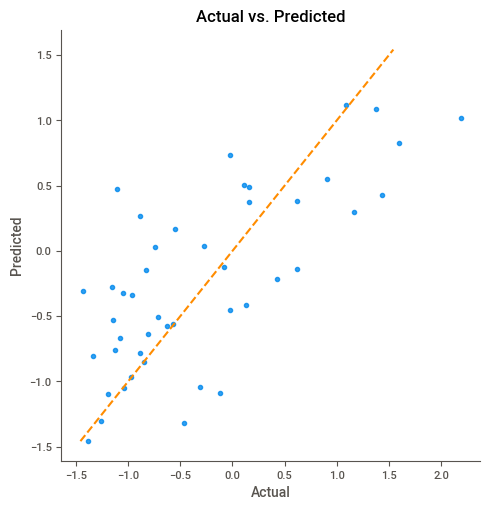

In [66]:
linear_assumption(lr_model, X_test, y_test)

Lets proceed to some analysis

In [40]:
import statsmodels.api as sm


X_train_LR = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train_LR).fit()
predictions = model.predict(X_train_LR) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     49.88
Date:                Fri, 23 Dec 2022   Prob (F-statistic):           4.28e-55
Time:                        19:51:56   Log-Likelihood:                -424.24
No. Observations:                 397   AIC:                             866.5
Df Residuals:                     388   BIC:                             902.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0012      0.024     -0.050      0.9

## According to this, data seems to follow this linear assumption, although dataset seems to have a lot of noise ! 


In [86]:
X_train.shape, y_train.shape

((397, 9), (397,))

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
scoring = 'neg_mean_squared_error'

parameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C':[2,4,6,8,10],'gamma': [1e-7, 1e-4, 1e-3],'epsilon':[0.1,0.2,0.5,0.3]}
svr = SVR()
clf = GridSearchCV(svr, parameters, scoring = scoring)
clf.fit(X_train,y_train)
results = clf.best_params_
results

{'C': 10, 'epsilon': 0.5, 'gamma': 1e-07, 'kernel': 'linear'}

In [102]:
svr = SVR(kernel = 'linear', gamma = results['gamma'], epsilon = results['epsilon'], C = results['C'])
svr.fit(X_train, y_train)
y_train_pred = svr.predict(X_train)


In [103]:
svr.score(X_train, y_train, sample_weight=None)

0.5042577994723974

In [104]:
print("1) The model explains,", np.round(mt.explained_variance_score(y_train,y_train_pred)*100,2),"% variance of the target variable")
print("2) The Mean Absolute Error of model is:", np.round(mt.mean_absolute_error(y_train,y_train_pred),2))
print("3) The R-Square score of the model is " , np.round(mt.r2_score(y_train,y_train_pred),2))
print("3) The mean square error on train data is: " , np.round(mean_squared_error(y_train,y_train_pred),2))

1) The model explains, 50.43 % variance of the target variable
2) The Mean Absolute Error of model is: 0.57
3) The R-Square score of the model is  0.5
3) The mean square error on train data is:  0.5


As before, results from training a linear svr (used Grid search to optimize the hyperparameters) are same as linear regression, the model seems to explain roughly 51 % of variance.

In [147]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
DTR = DecisionTreeRegressor()
DTR.fit(X_train, y_train)
y_pred = DTR.predict(X_train)
mse = mean_squared_error(y_pred, y_train)
rmse = np.sqrt(mse)
print(f"mean squared error for decison tree regressor: {mse}")
print(f"root mean squared error for decison tree regressor: {rmse}")

mean squared error for decison tree regressor: 0.0
root mean squared error for decison tree regressor: 0.0


#### It is more likely that this model has ovefit the data. We don’t want to touch the test set yet until we are ready to launch a model we are confident about, so we need to use part of the training set for training and part of it for model validation.

In [148]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(DTR, X_train, y_train,
scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [149]:
print(scores)
print("Mean:", scores.mean())
print("standard deviation:", scores.std())

[-0.76510962 -1.17434139 -0.98113746 -0.80198288 -1.01992042 -1.40362358
 -1.27203912 -1.06373908 -1.45401058 -0.88417131]
Mean: -1.0820075446779256
standard deviation: 0.22777209525322584


This model now seems to perform worse than linear regression and Linear SVR. Indeed if we compute scorings using the exact same method:

In [150]:
scores = cross_val_score(lr_model, X_train, y_train,
scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [151]:
print(scores)
print("Mean:", scores.mean())
print("standard deviation:", scores.std())

[-0.2966818  -0.53167942 -0.48169713 -0.49077636 -0.4119855  -0.95812633
 -0.56794092 -0.56449342 -0.54228304 -0.42804302]
Mean: -0.5273706930755678
standard deviation: 0.1639017119514132


### Lets try a Random Forest Regressor now. We are going to set a max depth = 7.

#### In order to make training more efficient and have a better understanding of possible overfitting issues we are going to use cross validation.

In [152]:
from sklearn.ensemble import RandomForestRegressor

random_forest_reg = RandomForestRegressor(max_depth=7, n_estimators=10)
#random_forest_reg.fit(X_train, y_train)
#y_pred = random_forest_reg.predict(X_train)
#mse = mean_squared_error(y_pred, y_train)
#rmse = np.sqrt(mse)
#print(f"mean squared error for decison tree regressor: {mse}")
#print(f"root mean squared error for decison tree regressor: {rmse}")


scores = cross_val_score(random_forest_reg, X_train, y_train,
scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)


print(scores)
print("Mean:", scores.mean())
print("standard deviation:", scores.std())

[-0.4442759  -0.78761757 -0.476563   -0.53385651 -0.50775566 -0.97887706
 -0.87634317 -0.62988847 -0.58435199 -0.49147326]
Mean: -0.631100259857016
standard deviation: 0.17627488925142556


We can observe better results.

### Model Finetuning

In [154]:
param_grid = [
 {'n_estimators': [3, 9, 27], 'max_depth': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_depth': [2, 3, 4]},
 ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [2, 4, 6, 8],
                          'n_estimators': [3, 9, 27]},
                         {'bootstrap': [False], 'max_depth': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [160]:
grid_search.best_estimator_


RandomForestRegressor(max_depth=4, n_estimators=9)

In [163]:
final_model = grid_search.best_estimator_
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_train)
mse = mean_squared_error(y_pred, y_train)
rmse = np.sqrt(mse)
print(f"mean squared error for final model: {mse}")
print(f"root mean squared error for final model: {rmse}")


mean squared error for final model: 0.3882872817493705
root mean squared error for final model: 0.6231270189530947


### Model evaluation


In [169]:
from sklearn.metrics import r2_score
test_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, test_predictions)
final_rmse = np.sqrt(final_mse) 
r_2 = r2_score(y_test, test_predictions)

print(f"mean squared error for decison tree regressor: {final_mse}")
print(f"root mean squared error for decison tree regressor: {final_rmse}")

mean squared error for decison tree regressor: 0.41320581538267526
root mean squared error for decison tree regressor: 0.6428108706164475


The model performs slightly worse in test set (as expected), Perfomance on test set does not seem to deviate from training set, implying good fit (No overfitting issues). We can store this model using $\textbf{joblib} $ library

In [170]:
import joblib

In [171]:
joblib.dump(final_model, "final_model.pkl")

['final_model.pkl']